In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import timedelta
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV


In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
france=pd.read_excel('France.xlsx')
germany=pd.read_excel('Allemagne.xlsx')
switzerland=pd.read_excel('Suisse.xlsx')
portugal=pd.read_excel('Portugal.xlsx')

In [5]:
france.set_index(france.columns[0], inplace=True)
france.index = france.index.astype(str)
france.index = pd.to_datetime(france.index)
france = france.drop(france.columns[[1, 4]], axis=1)
france = france.loc['2000-01-01':]

germany.set_index(germany.columns[0], inplace=True)
germany.index = germany.index.astype(str)
germany.index = pd.to_datetime(germany.index)
germany = germany.drop(germany.columns[[2]], axis=1)
germany = germany.loc['2000-01-01':]

switzerland.set_index(switzerland.columns[0], inplace=True)
switzerland.index = switzerland.index.astype(str)
switzerland.index = pd.to_datetime(switzerland.index)
switzerland = switzerland.drop(switzerland.columns[[1]], axis=1)
switzerland = switzerland.loc['2000-01-01':]

portugal.set_index(portugal.columns[0], inplace=True)
portugal.index = portugal.index.astype(str)
portugal.index = pd.to_datetime(portugal.index)

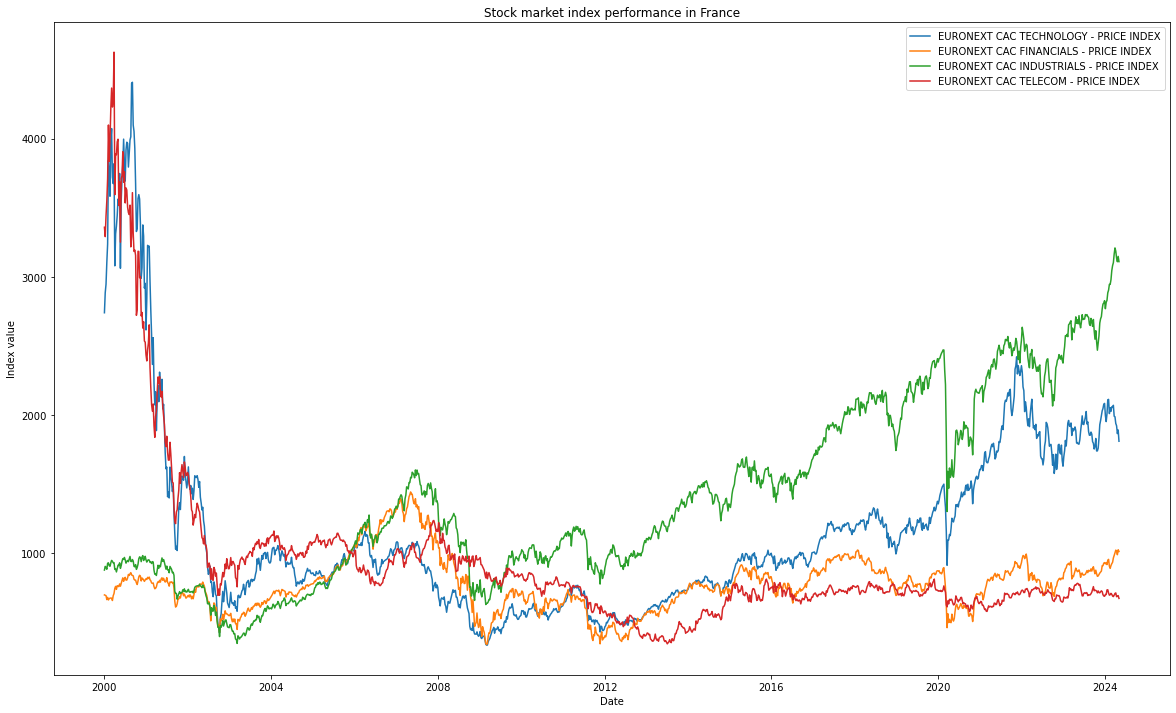

In [6]:
plt.figure(figsize=(20,12))  

for column in france.columns:
    plt.plot(france.index, france[column], label=column)

plt.title("Stock market index performance in France")
plt.xlabel("Date")
plt.ylabel("Index value")
plt.legend()
plt.savefig('Graph France index.pdf', bbox_inches='tight')
plt.show()

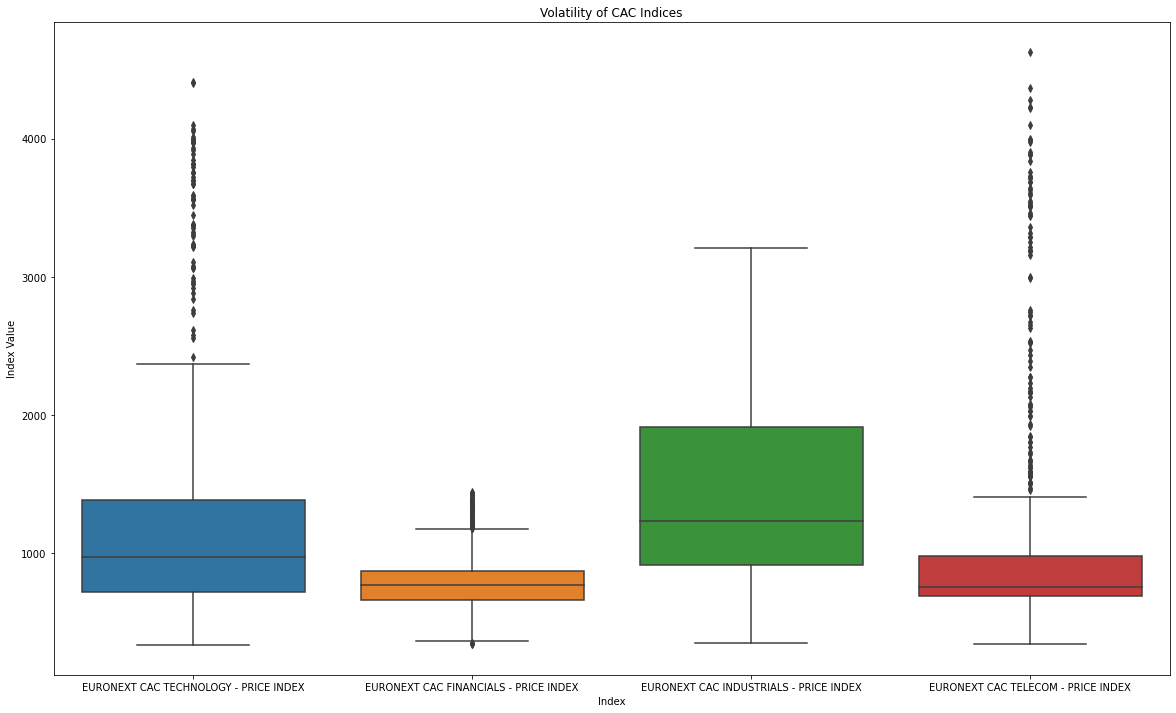

In [7]:
plt.figure(figsize=(20,12))
sns.boxplot(data=france[['EURONEXT CAC TECHNOLOGY - PRICE INDEX', 'EURONEXT CAC FINANCIALS - PRICE INDEX', 'EURONEXT CAC INDUSTRIALS - PRICE INDEX', 'EURONEXT CAC TELECOM - PRICE INDEX']], orient='v')
plt.title('Volatility of CAC Indices')
plt.ylabel('Index Value')
plt.xlabel('Index')
plt.savefig('Boite France index.pdf', bbox_inches='tight')
plt.show()

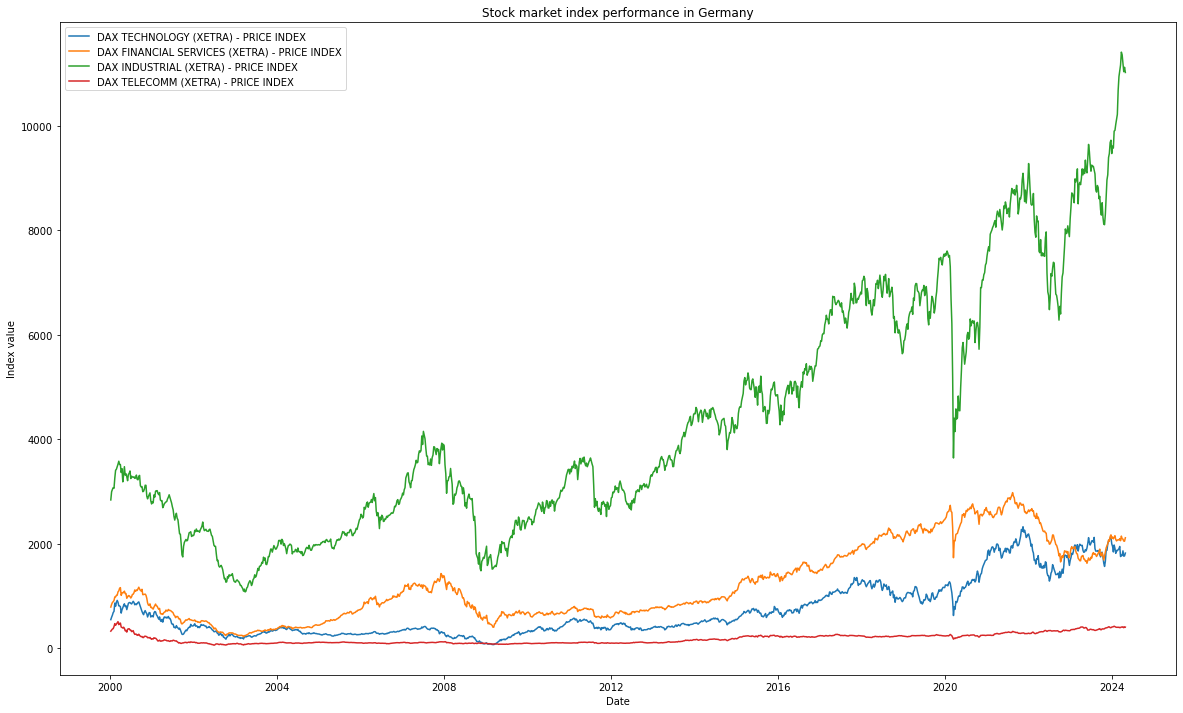

In [8]:
plt.figure(figsize=(20,12))  

for column in germany.columns:
    plt.plot(germany.index, germany[column], label=column)

plt.title("Stock market index performance in Germany")
plt.xlabel("Date")
plt.ylabel("Index value")
plt.legend()
plt.savefig('Graph Germany index.pdf', bbox_inches='tight')
plt.show()

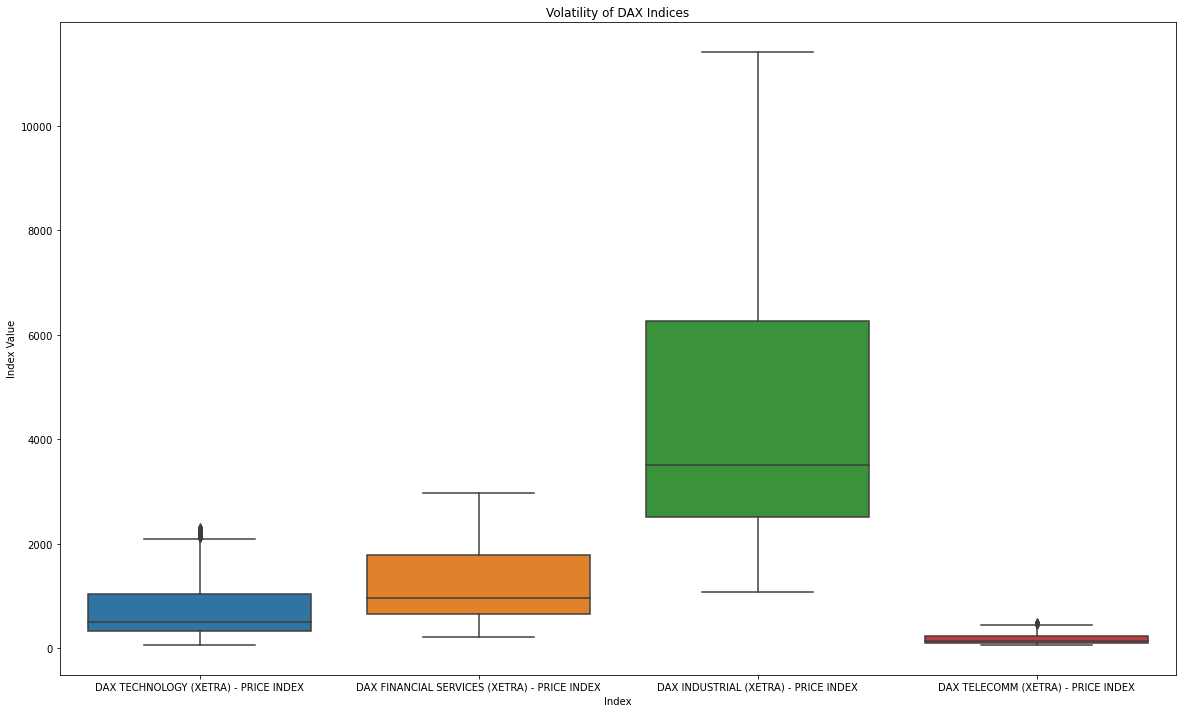

In [9]:
plt.figure(figsize=(20,12))
sns.boxplot(data=germany[['DAX TECHNOLOGY (XETRA) - PRICE INDEX', 'DAX FINANCIAL SERVICES (XETRA) - PRICE INDEX', 'DAX INDUSTRIAL (XETRA) - PRICE INDEX', 'DAX TELECOMM (XETRA) - PRICE INDEX']], orient='v')
plt.title('Volatility of DAX Indices')
plt.ylabel('Index Value')
plt.xlabel('Index')
plt.savefig('Boite Germany index.pdf', bbox_inches='tight')
plt.show()

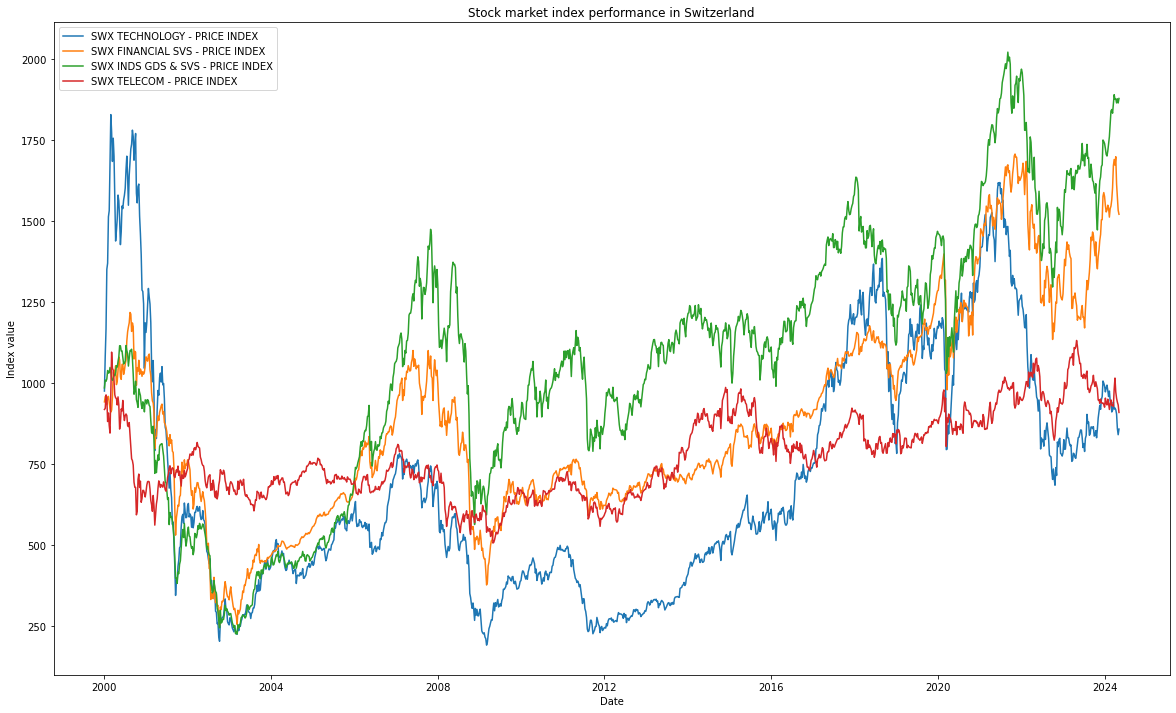

In [10]:
plt.figure(figsize=(20,12))  

for column in switzerland.columns:
    plt.plot(switzerland.index, switzerland[column], label=column)

plt.title("Stock market index performance in Switzerland")
plt.xlabel("Date")
plt.ylabel("Index value")
plt.legend()
plt.savefig('Graph Switzerland index.pdf', bbox_inches='tight')
plt.show()

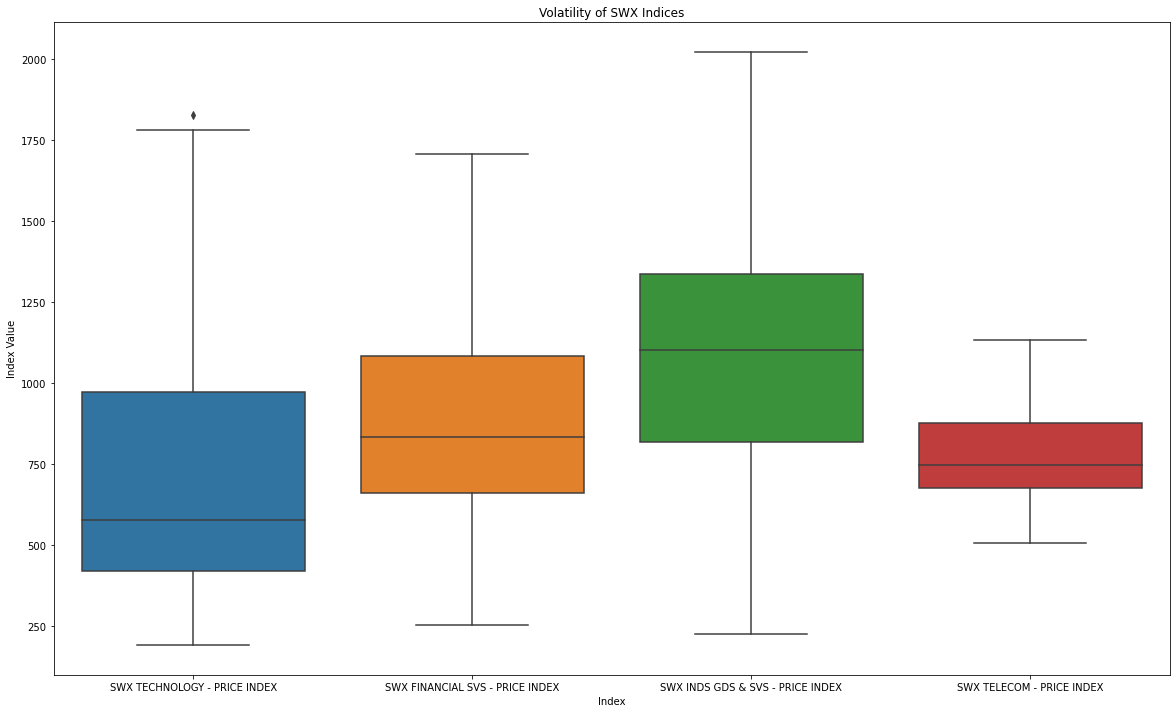

In [11]:
plt.figure(figsize=(20,12))
sns.boxplot(data=switzerland[['SWX TECHNOLOGY - PRICE INDEX', 'SWX FINANCIAL SVS - PRICE INDEX', 'SWX INDS GDS & SVS - PRICE INDEX', 'SWX TELECOM - PRICE INDEX']], orient='v')
plt.title('Volatility of SWX Indices')
plt.ylabel('Index Value')
plt.xlabel('Index')
plt.savefig('Boite Suisse index.pdf', bbox_inches='tight')
plt.show()

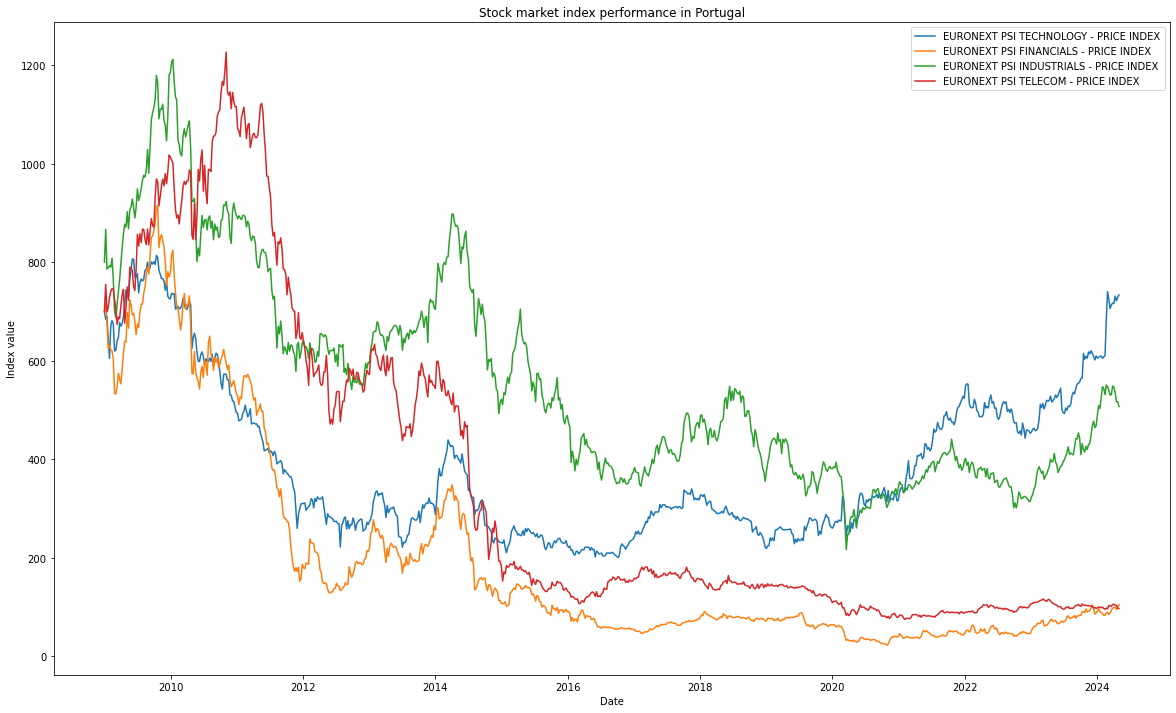

In [12]:
plt.figure(figsize=(20,12))  

for column in portugal.columns:
    plt.plot(portugal.index, portugal[column], label=column)

plt.title("Stock market index performance in Portugal")
plt.xlabel("Date")
plt.ylabel("Index value")
plt.legend()
plt.savefig('Graph Portugal index.pdf', bbox_inches='tight')
plt.show()

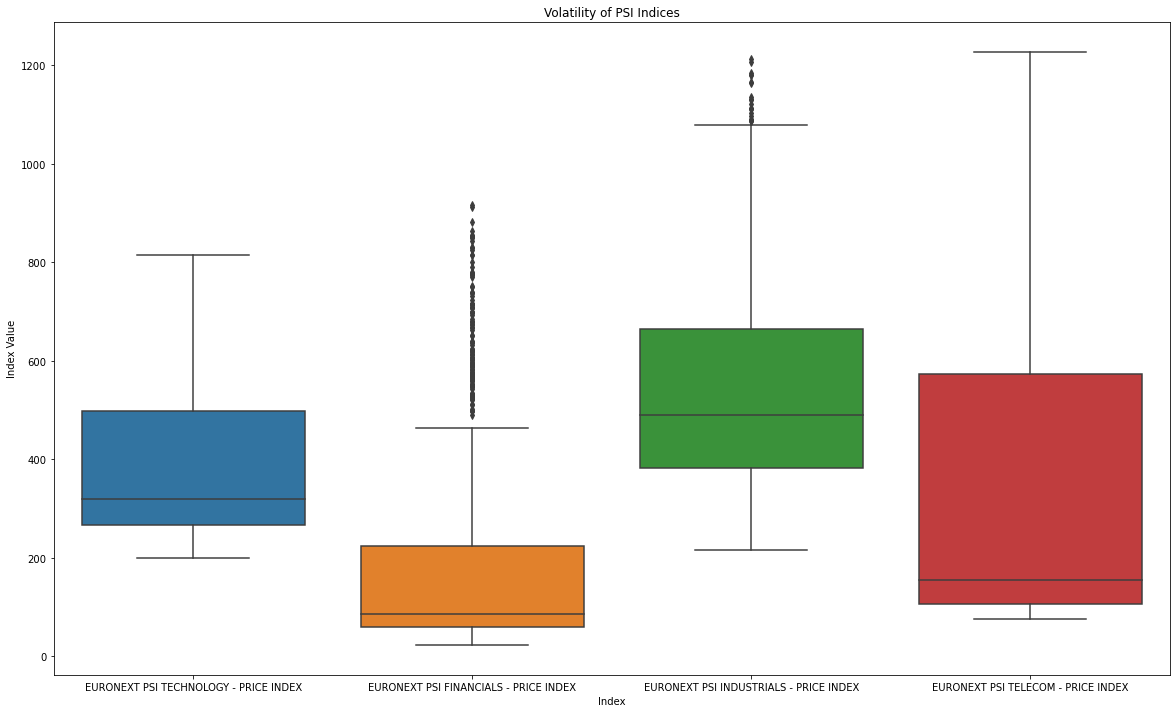

In [13]:
plt.figure(figsize=(20,12))
sns.boxplot(data=portugal[['EURONEXT PSI TECHNOLOGY - PRICE INDEX', 'EURONEXT PSI FINANCIALS - PRICE INDEX', 'EURONEXT PSI INDUSTRIALS - PRICE INDEX', 'EURONEXT PSI TELECOM - PRICE INDEX']], orient='v')
plt.title('Volatility of PSI Indices')
plt.ylabel('Index Value')
plt.xlabel('Index')
plt.savefig('Boite Portugal index.pdf', bbox_inches='tight')
plt.show()

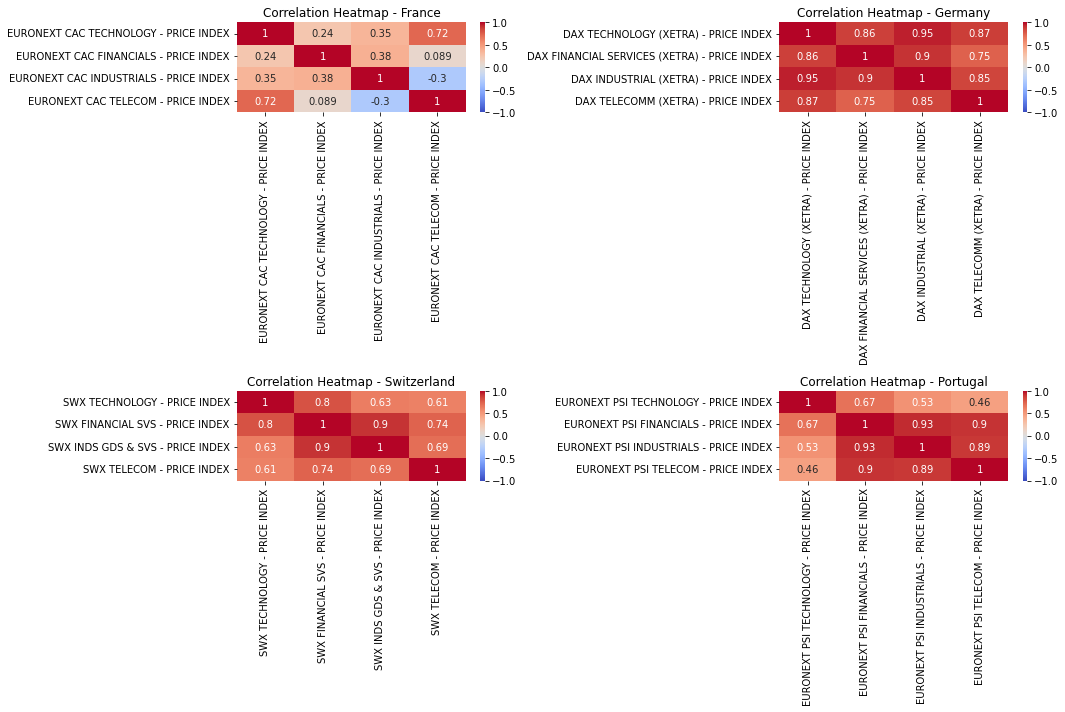

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 
sns.heatmap(france.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[0, 0])
axs[0, 0].set_title('Correlation Heatmap - France')
sns.heatmap(germany.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[0, 1])
axs[0, 1].set_title('Correlation Heatmap - Germany')
sns.heatmap(switzerland.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 0])
axs[1, 0].set_title('Correlation Heatmap - Switzerland')
sns.heatmap(portugal.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 1])
axs[1, 1].set_title('Correlation Heatmap - Portugal')
plt.tight_layout()
with PdfPages('countries correlation.pdf') as pdf:
    pdf.savefig(fig)


In [15]:
france.columns = ['Technology', 'Financials', 'Industrials','Telecom']
germany.columns = ['Technology', 'Financials', 'Industrials','Telecom']
switzerland.columns = ['Technology', 'Financials', 'Industrials','Telecom']
switzerland.index = switzerland.index - timedelta(days=1)
portugal.columns = ['Technology', 'Financials', 'Industrials','Telecom']
allindexes = pd.concat([france, germany, switzerland, portugal], axis=1)

technology = pd.concat([france[['Technology']].rename(columns={'Technology': 'France'}),
                           germany[['Technology']].rename(columns={'Technology': 'Germany'}),
                           switzerland[['Technology']].rename(columns={'Technology': 'Switzerland'}),
                           portugal[['Technology']].rename(columns={'Technology': 'Portugal'})], axis=1)

financials = pd.concat([france[['Financials']].rename(columns={'Financials': 'France'}),
                           germany[['Financials']].rename(columns={'Financials': 'Germany'}),
                           switzerland[['Financials']].rename(columns={'Financials': 'Switzerland'}),
                           portugal[['Financials']].rename(columns={'Financials': 'Portugal'})], axis=1)

industrials = pd.concat([france[['Industrials']].rename(columns={'Industrials': 'France'}),
                            germany[['Industrials']].rename(columns={'Industrials': 'Germany'}),
                            switzerland[['Industrials']].rename(columns={'Industrials': 'Switzerland'}),
                            portugal[['Industrials']].rename(columns={'Industrials': 'Portugal'})], axis=1)

telecom = pd.concat([france[['Telecom']].rename(columns={'Telecom': 'France'}),
                        germany[['Telecom']].rename(columns={'Telecom': 'Germany'}),
                        switzerland[['Telecom']].rename(columns={'Telecom': 'Switzerland'}),
                        portugal[['Telecom']].rename(columns={'Telecom': 'Portugal'})], axis=1)

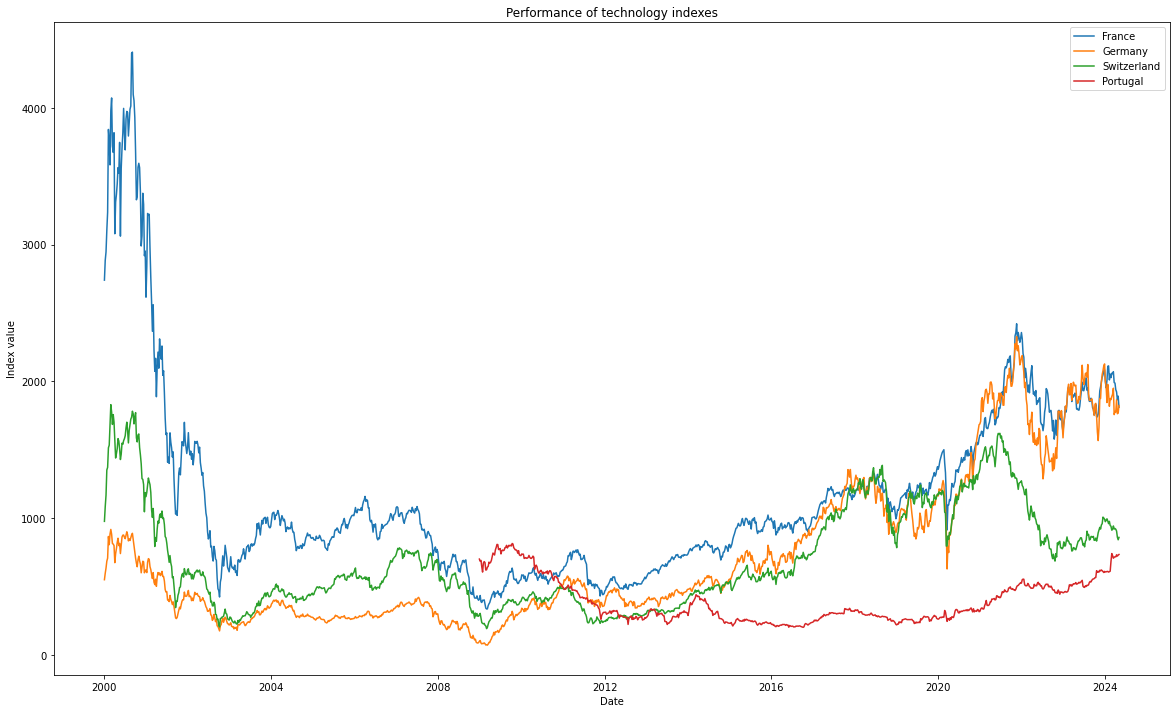

In [16]:
plt.figure(figsize=(20,12))  

for column in technology.columns:
    plt.plot(technology.index, technology[column], label=column)

plt.title("Performance of technology indexes")
plt.xlabel("Date")
plt.ylabel("Index value")
plt.legend()
plt.savefig('Graph Technologie.pdf', bbox_inches='tight')
plt.show()

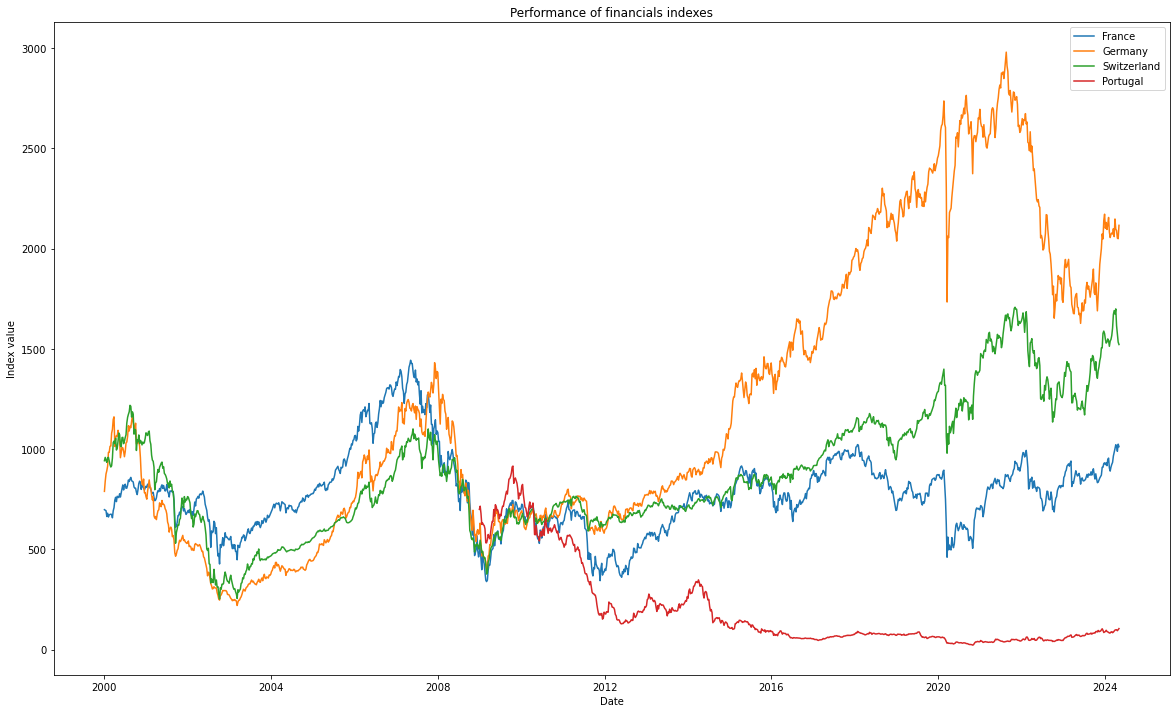

In [17]:
plt.figure(figsize=(20,12))  

for column in financials.columns:
    plt.plot(financials.index, financials[column], label=column)

plt.title("Performance of financials indexes")
plt.xlabel("Date")
plt.ylabel("Index value")
plt.legend()
plt.savefig('Graph financials.pdf', bbox_inches='tight')
plt.show()

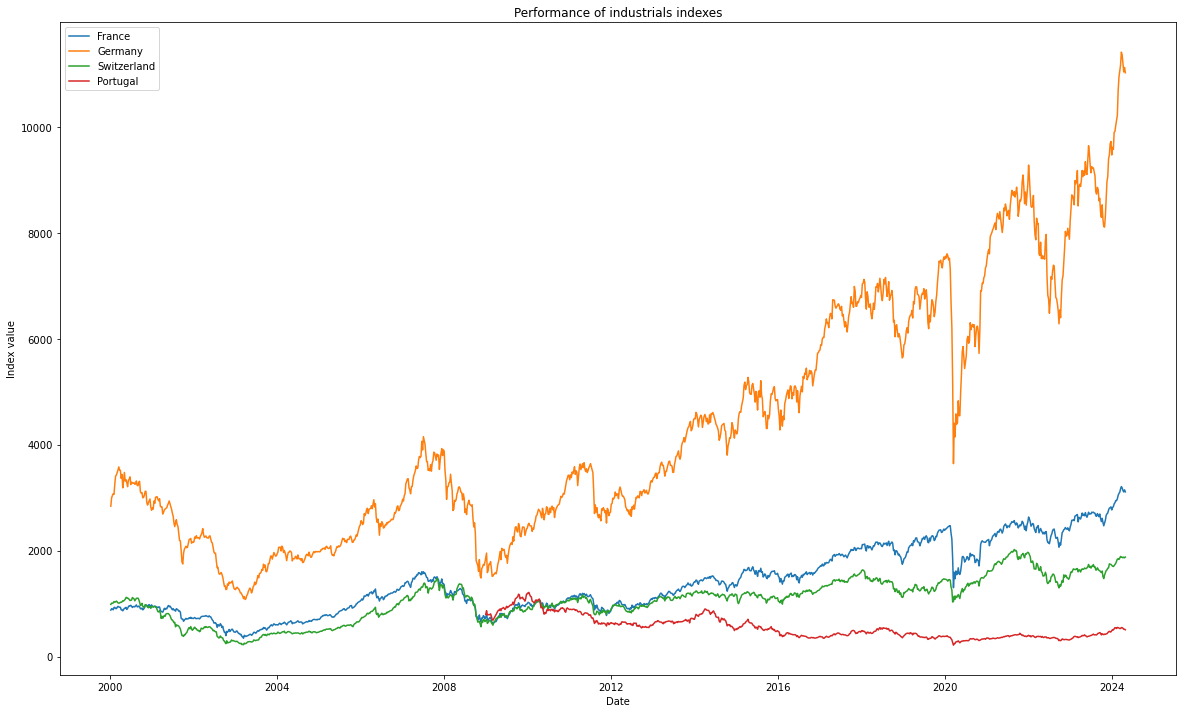

In [18]:
plt.figure(figsize=(20,12))  

for column in industrials.columns:
    plt.plot(industrials.index, industrials[column], label=column)

plt.title("Performance of industrials indexes")
plt.xlabel("Date")
plt.ylabel("Index value")
plt.legend()
plt.savefig('Graph industrials.pdf', bbox_inches='tight')
plt.show()

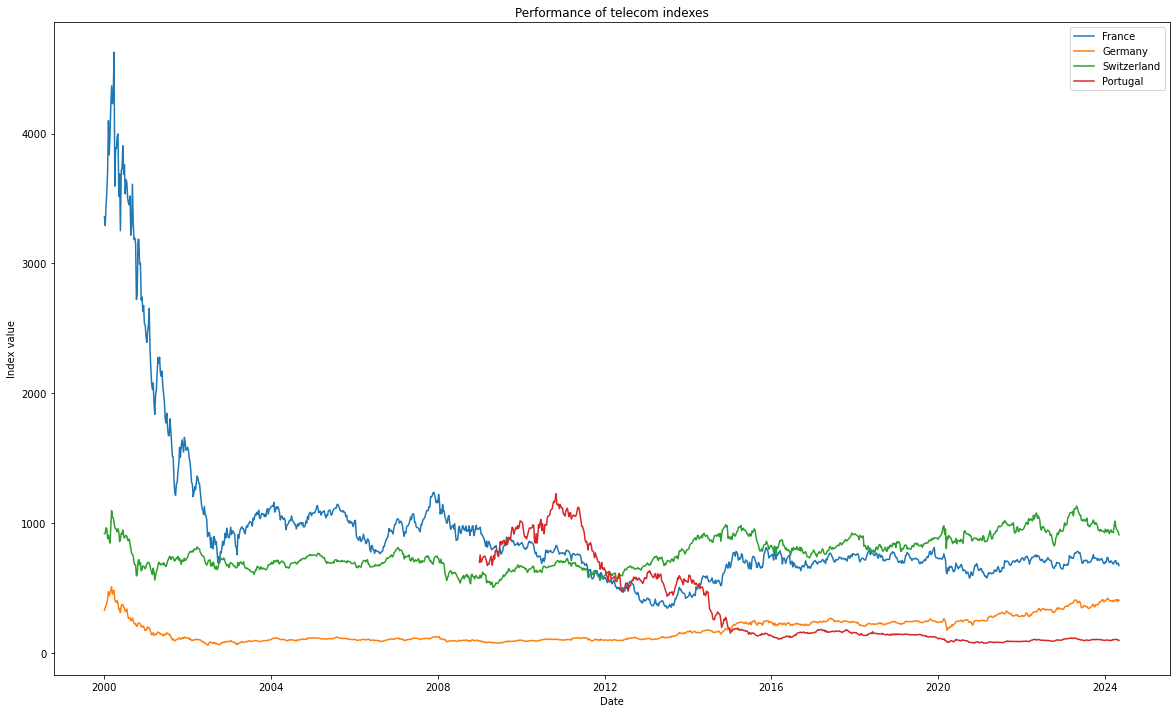

In [19]:
plt.figure(figsize=(20,12))  

for column in telecom.columns:
    plt.plot(telecom.index, telecom[column], label=column)

plt.title("Performance of telecom indexes")
plt.xlabel("Date")
plt.ylabel("Index value")
plt.legend()
plt.savefig('Graph telecom.pdf', bbox_inches='tight')
plt.show()

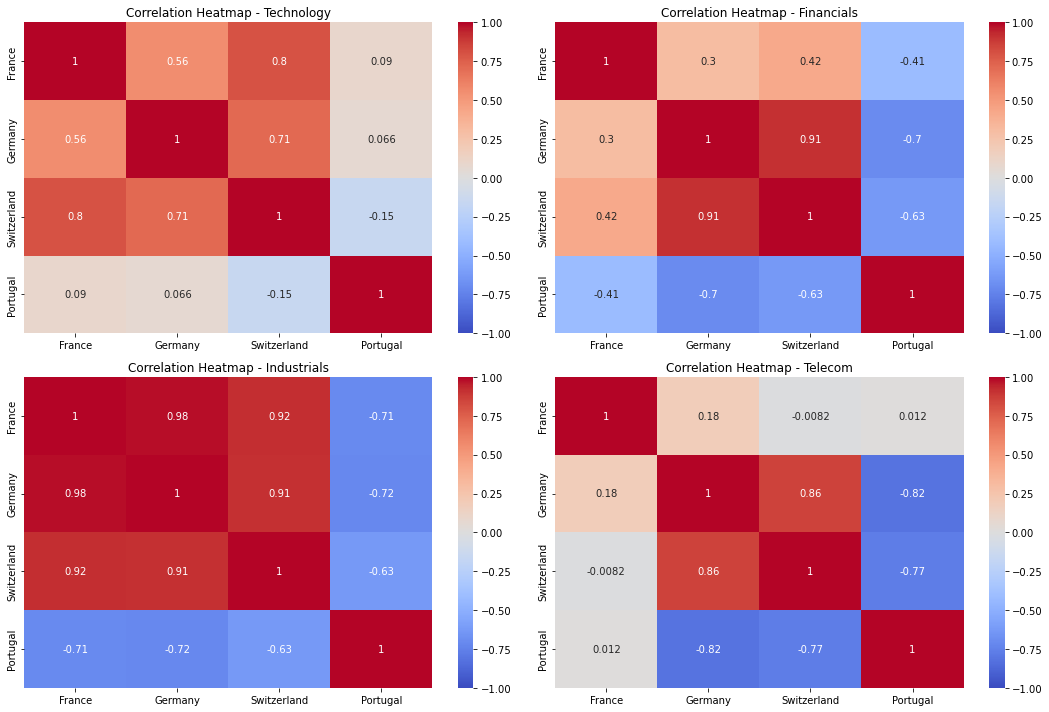

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 
sns.heatmap(technology.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[0, 0])
axs[0, 0].set_title('Correlation Heatmap - Technology')
sns.heatmap(financials.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[0, 1])
axs[0, 1].set_title('Correlation Heatmap - Financials')
sns.heatmap(industrials.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 0])
axs[1, 0].set_title('Correlation Heatmap - Industrials')
sns.heatmap(telecom.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axs[1, 1])
axs[1, 1].set_title('Correlation Heatmap - Telecom')
plt.tight_layout()
with PdfPages('sectors correlation.pdf') as pdf:
    pdf.savefig(fig)



In [21]:
crises_france={'Dotcom bubble burst':['2000-03-01','2003-01-01'],'Subprime crises':['2007-11-01','2009-01-01'],'Covid 19':['2020-01-01','2021-01-01']}
stimulus_policies_france = {'LCME':['2003-01-01','2004-01-01'],'Stimulus policy 2009':['2009-01-01', '2011-01-01'],'Stimulus policy Covid':['2020-03-01','2022-06-01']}

for crisis, (start_date,end_date) in crises_france.items():
    france[crisis] = ((france.index >= pd.to_datetime(start_date)) & (france.index <= pd.to_datetime(end_date))).astype(int)

for policy, (start_date, end_date) in stimulus_policies_france.items():
    france[policy] = ((france.index >= pd.to_datetime(start_date)) & (france.index <= pd.to_datetime(end_date))).astype(int)

crises_germany={'Dotcom bubble burst':['2000-03-01','2003-01-01'],'Subprime crises':['2007-11-01','2009-01-01'],'Covid 19':['2020-01-01','2021-01-01']}
stimulus_policies_germany ={'Hartz and Agenda2010':['2009-01-01', '2010-06-01'],'Konjunkturpaket I':['2008-11-01', '2011-01-01'],'Konjunkturpaket II':['2009-02-01', '2011-01-01'],'Stimulus policy Covid':['2020-03-01','2023-01-01']}

for crisis, (start_date, end_date) in crises_germany.items():
    germany[crisis] = ((germany.index >= pd.to_datetime(start_date)) & (germany.index <= pd.to_datetime(end_date))).astype(int)

for policy, (start_date, end_date) in stimulus_policies_germany.items():
    germany[policy] = ((germany.index >= pd.to_datetime(start_date)) & (germany.index <= pd.to_datetime(end_date))).astype(int)

crises_switzerland={'Dotcom bubble burst':['2000-03-01','2003-01-01'],'Subprime crises':['2007-11-01','2009-01-01'],'Covid 19':['2020-01-01','2021-01-01']}
stimulus_policies_switzerland={'Stimulus policy 2001':['2001-05-01','2003-05-01'],'Stimulus policy 2009':['2009-01-01', '2010-06-01'],'Stimulus policy Covid':['2020-04-01','2023-01-01']}

for crisis, (start_date, end_date) in crises_switzerland.items():
    switzerland[crisis] = ((switzerland.index >= pd.to_datetime(start_date)) & (switzerland.index <= pd.to_datetime(end_date))).astype(int)

for policy, (start_date, end_date) in stimulus_policies_switzerland.items():
    switzerland[policy] = ((switzerland.index >= pd.to_datetime(start_date)) & (switzerland.index <= pd.to_datetime(end_date))).astype(int)

crises_portugal={'Sovereign debt crisis':['2010-01-01','2012-01-01'],'Covid 19':['2020-01-01','2021-01-01']}
stimulus_policies_portugal={'Stimulus debt crisis':['2011-05-01','2014-05-01'],'Political Instability':['2014-01-01','2015-01-01'],'Stimulus policy Covid':['2020-03-01','2022-06-01']}

for crisis, (start_date, end_date) in crises_portugal.items():
    portugal[crisis] = ((portugal.index >= pd.to_datetime(start_date))& (portugal.index <= pd.to_datetime(end_date))).astype(int)

for policy, (start_date, end_date) in stimulus_policies_portugal.items():
    portugal[policy] = ((portugal.index >= pd.to_datetime(start_date)) & (portugal.index <= pd.to_datetime(end_date))).astype(int)


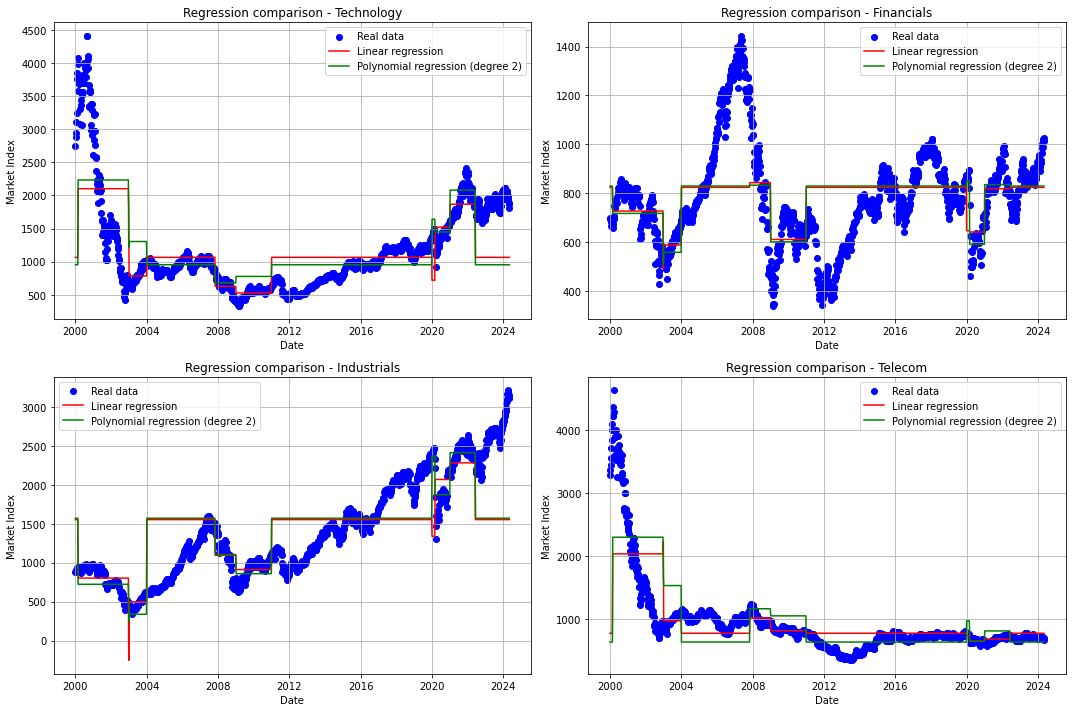

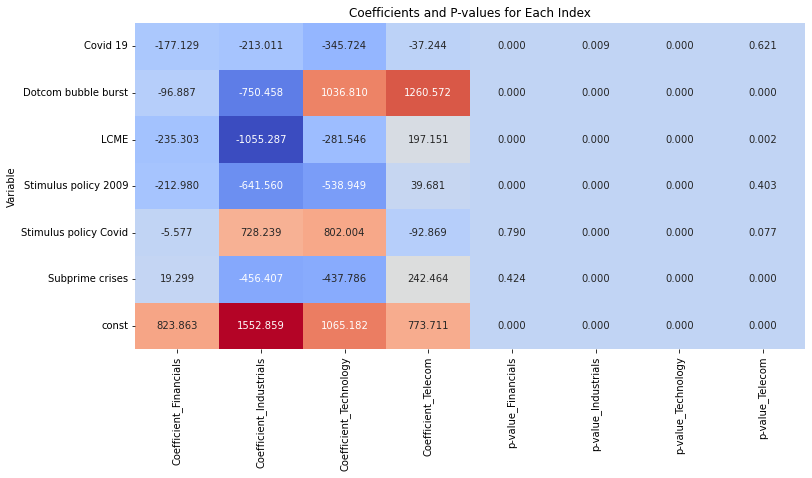

In [22]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'LCME','Stimulus policy 2009', 'Stimulus policy Covid'] # Variable de contrôle utilisée dans toutes les régressions

poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

results_france = pd.DataFrame()


for i, index in enumerate(indices):
    X = france[control_var].values  
    y = france[index].values  

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred_lin = lin_reg.predict(X)

    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)

    X_sm = sm.add_constant(france[control_var])
    model = sm.OLS(y, X_sm).fit()

    results_index = pd.DataFrame({'Coefficient': model.params,'p-value': model.pvalues})
    results_index['Indice'] = index
    results_index.reset_index(inplace=True)
    results_index.rename(columns={'index': 'Variable'}, inplace=True)

    results_france = pd.concat([results_france, results_index], axis=0)

    dates = france.index
    axs[i].scatter(dates, y, color='blue', label='Real data')
    axs[i].plot(dates, y_pred_lin, color='red', label='Linear regression')
    axs[i].plot(dates, y_pred_poly, color='green', label=f'Polynomial regression (degree {poly_degree})')
    axs[i].set_title(f'Regression comparison - {index}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Market Index')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
fig.savefig('regression_france.pdf', format='pdf')
plt.show()

results_france = results_france.pivot(index='Variable', columns='Indice', values=['Coefficient', 'p-value'])
results_france.columns = ['_'.join(col).strip() for col in results_france.columns.values]

plt.figure(figsize=(12, 6))
sns.heatmap(results_france, annot=True, fmt=".3f", cmap='coolwarm', cbar=False)
plt.title('Coefficients and P-values for Each Index')
plt.savefig('regression table france.pdf', format='pdf')
plt.show()


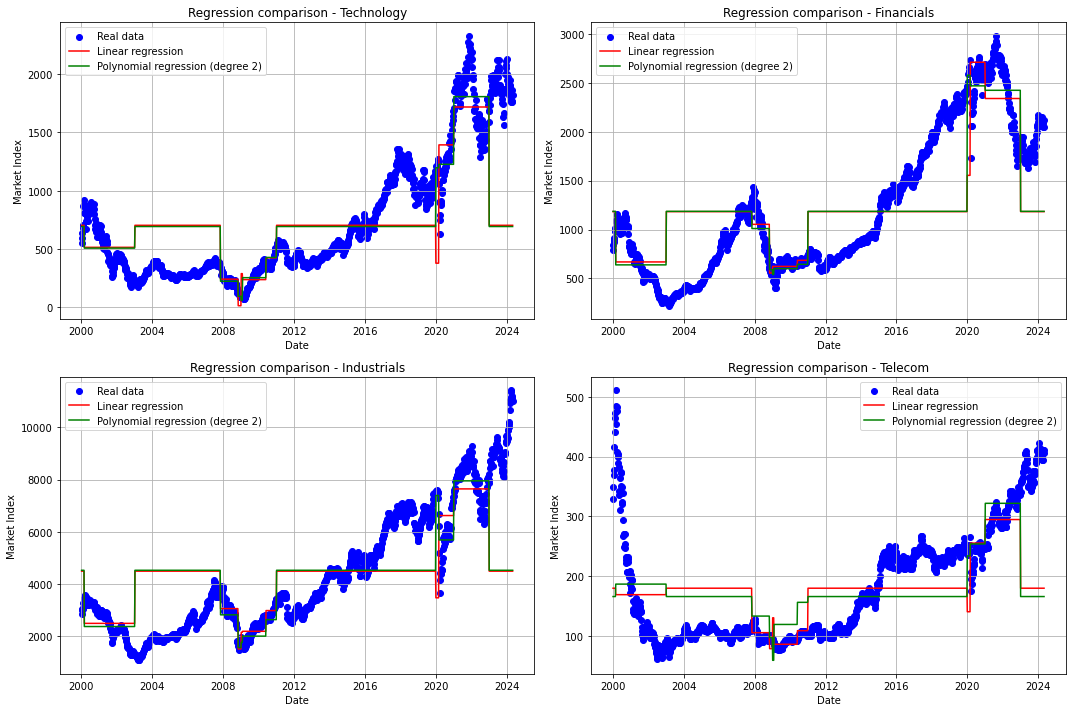

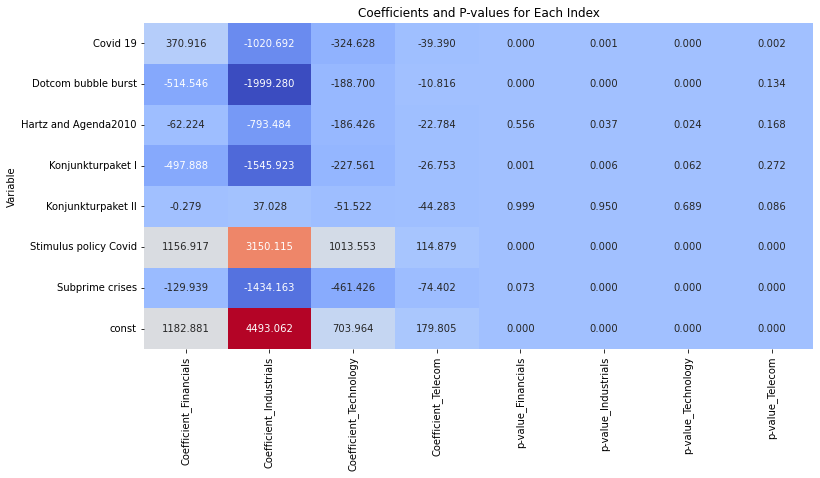

In [23]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19','Hartz and Agenda2010', 'Konjunkturpaket I', 'Konjunkturpaket II','Stimulus policy Covid']

poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)


fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

results_germany = pd.DataFrame()

for i, index in enumerate(indices):
    X = germany[control_var].values  
    y = germany[index].values 

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred_lin = lin_reg.predict(X)

    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)

    X_sm = sm.add_constant(germany[control_var])
    model = sm.OLS(y, X_sm).fit()

    results_index = pd.DataFrame({'Coefficient': model.params,'p-value': model.pvalues})
    results_index['Indice'] = index
    results_index.reset_index(inplace=True)
    results_index.rename(columns={'index': 'Variable'}, inplace=True)

    results_germany = pd.concat([results_germany, results_index], axis=0)

    dates = germany.index
    axs[i].scatter(dates, y, color='blue', label='Real data')
    axs[i].plot(dates, y_pred_lin, color='red', label='Linear regression')
    axs[i].plot(dates, y_pred_poly, color='green', label=f'Polynomial regression (degree {poly_degree})')
    axs[i].set_title(f'Regression comparison - {index}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Market Index')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
fig.savefig('regression_germany.pdf', format='pdf')
plt.show()

results_germany = results_germany.pivot(index='Variable', columns='Indice', values=['Coefficient', 'p-value'])
results_germany.columns = ['_'.join(col).strip() for col in results_germany.columns.values]

plt.figure(figsize=(12, 6))
sns.heatmap(results_germany, annot=True, fmt=".3f", cmap='coolwarm', cbar=False)
plt.title('Coefficients and P-values for Each Index')
plt.savefig('regression table germany.pdf', format='pdf')
plt.show()


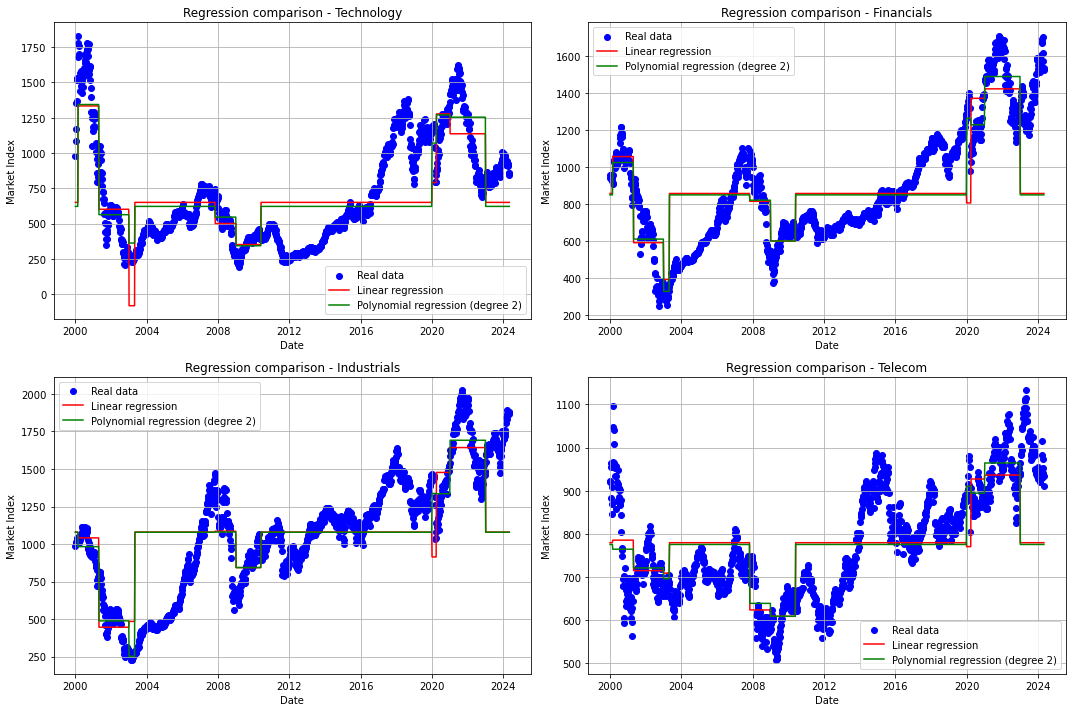

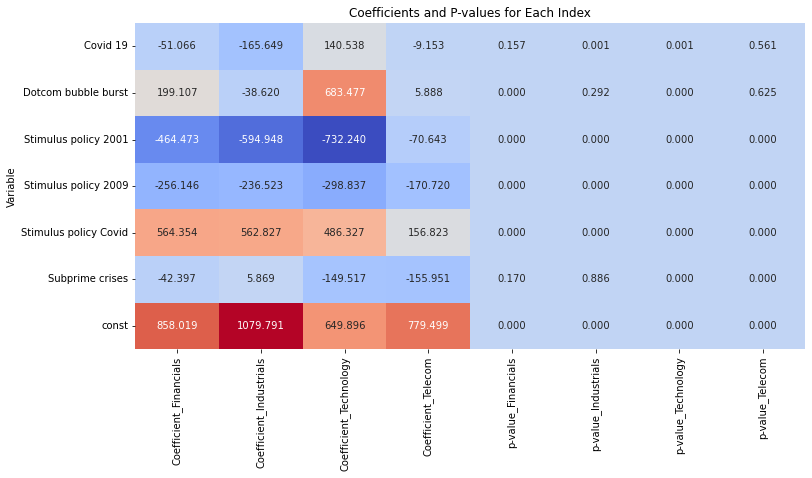

In [24]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19','Stimulus policy 2001', 'Stimulus policy 2009','Stimulus policy Covid']

poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)


fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

results_switzerland = pd.DataFrame()

for i, index in enumerate(indices):
    X = switzerland[control_var].values  
    y = switzerland[index].values  

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred_lin = lin_reg.predict(X)

    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)

    X_sm = sm.add_constant(switzerland[control_var])
    model = sm.OLS(y, X_sm).fit()

    results_index = pd.DataFrame({'Coefficient': model.params,'p-value': model.pvalues})
    results_index['Indice'] = index
    results_index.reset_index(inplace=True)
    results_index.rename(columns={'index': 'Variable'}, inplace=True)

    results_switzerland = pd.concat([results_switzerland, results_index], axis=0)

    dates = switzerland.index
    axs[i].scatter(dates, y, color='blue', label='Real data')
    axs[i].plot(dates, y_pred_lin, color='red', label='Linear regression')
    axs[i].plot(dates, y_pred_poly, color='green', label=f'Polynomial regression (degree {poly_degree})')
    axs[i].set_title(f'Regression comparison - {index}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Market Index')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
fig.savefig('regression_switzerland.pdf', format='pdf')
plt.show()

results_switzerland = results_switzerland.pivot(index='Variable', columns='Indice', values=['Coefficient', 'p-value'])
results_switzerland.columns = ['_'.join(col).strip() for col in results_switzerland.columns.values]

plt.figure(figsize=(12, 6))
sns.heatmap(results_switzerland, annot=True, fmt=".3f", cmap='coolwarm', cbar=False)
plt.title('Coefficients and P-values for Each Index')
plt.savefig('regression table switzerland.pdf', format='pdf')
plt.show()


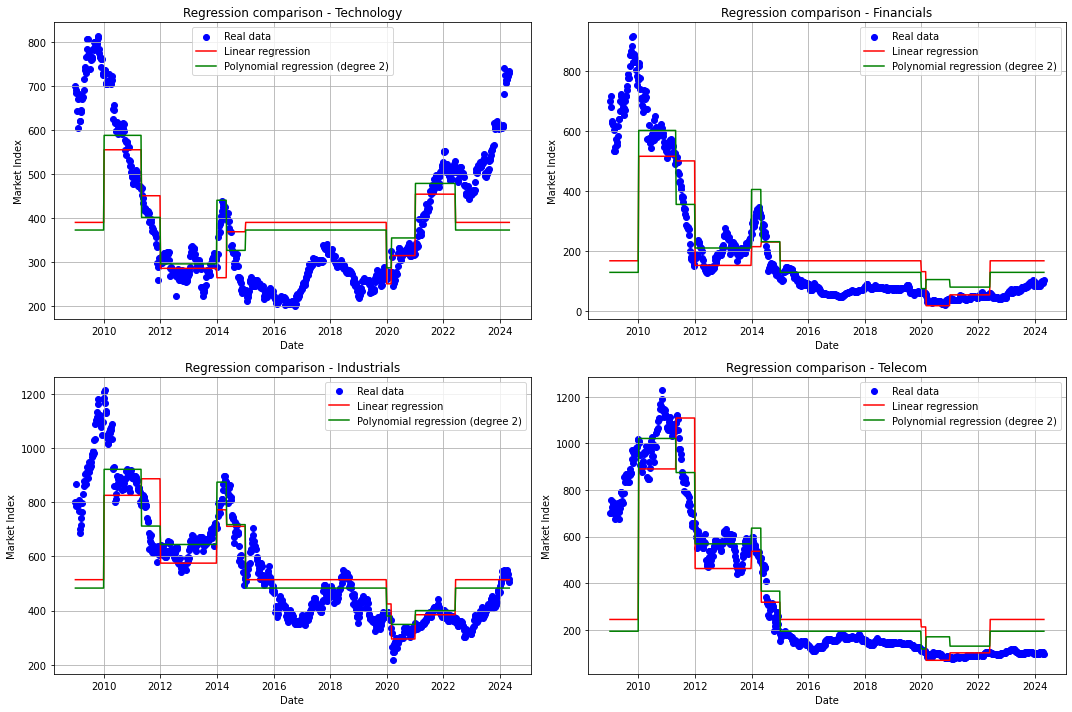

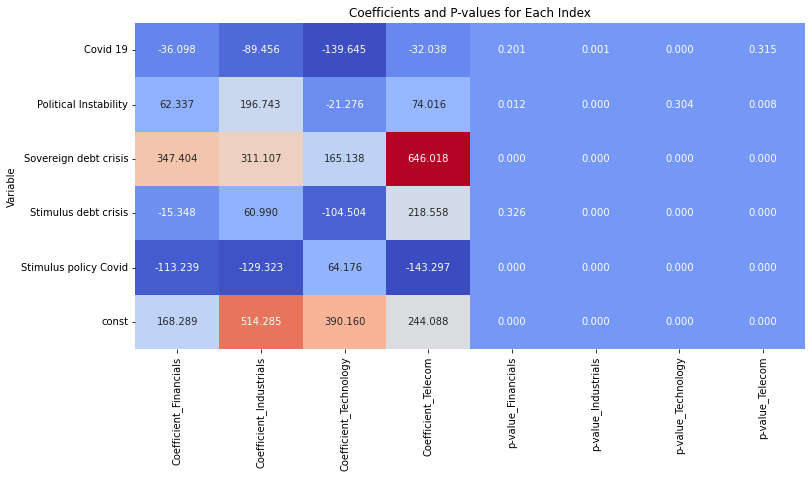

In [25]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var = ['Sovereign debt crisis', 'Covid 19', 'Stimulus debt crisis','Political Instability', 'Stimulus policy Covid']

poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

results_portugal = pd.DataFrame()

for i, index in enumerate(indices):
    X = portugal[control_var].values  
    y = portugal[index].values 

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred_lin = lin_reg.predict(X)

    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)

    X_sm = sm.add_constant(portugal[control_var])
    model = sm.OLS(y, X_sm).fit()

    results_index = pd.DataFrame({'Coefficient': model.params,'p-value': model.pvalues})
    results_index['Indice'] = index
    results_index.reset_index(inplace=True)
    results_index.rename(columns={'index': 'Variable'}, inplace=True)

    results_portugal = pd.concat([results_portugal, results_index], axis=0)

    dates = portugal.index
    axs[i].scatter(dates, y, color='blue', label='Real data')
    axs[i].plot(dates, y_pred_lin, color='red', label='Linear regression')
    axs[i].plot(dates, y_pred_poly, color='green', label=f'Polynomial regression (degree {poly_degree})')
    axs[i].set_title(f'Regression comparison - {index}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Market Index')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
fig.savefig('regression_portugal.pdf', format='pdf')
plt.show()

results_portugal = results_portugal.pivot(index='Variable', columns='Indice', values=['Coefficient', 'p-value'])
results_portugal.columns = ['_'.join(col).strip() for col in results_portugal.columns.values]

plt.figure(figsize=(12, 6))
sns.heatmap(results_portugal, annot=True, fmt=".3f", cmap='coolwarm', cbar=False)
plt.title('Coefficients and P-values for Each Index')
plt.savefig('regression table portugal.pdf', format='pdf')
plt.show()


In [26]:
bond=pd.read_excel('10Y Bond.xlsx')
bci=pd.read_excel('bci.xlsx')
cci=pd.read_excel('CCI.xlsx')
exchangerate=pd.read_excel('Exchange rate.xlsx')
gdp=pd.read_excel('GDP.xlsx')
inflation=pd.read_excel('Inflation.xlsx')

In [27]:
def load_excel_with_dates(file_path, date_column):
    df = pd.read_excel(file_path, parse_dates=[date_column], index_col=date_column)
    return df

bond = load_excel_with_dates('10Y Bond.xlsx', 0)  
bci = load_excel_with_dates('bci.xlsx', 0)
cci = load_excel_with_dates('CCI.xlsx', 0)
exchangerate = load_excel_with_dates('Exchange rate.xlsx', 0)
gdp = load_excel_with_dates('GDP.xlsx', 0)
inflation = load_excel_with_dates('Inflation.xlsx', 0)
unemployment=load_excel_with_dates('unemployment.xlsx', 0)

In [28]:
def quarter_to_date(quarter):
    year = int(quarter.split()[1])
    q = quarter.split()[0]
    if q == 'Q1':
        return pd.Timestamp(f'{year}-01-01')
    elif q == 'Q2':
        return pd.Timestamp(f'{year}-04-01')
    elif q == 'Q3':
        return pd.Timestamp(f'{year}-07-01')
    elif q == 'Q4':
        return pd.Timestamp(f'{year}-10-01')
    else:
        raise ValueError(f"Trimestre non reconnu : {quarter}")

date_index = pd.Index([quarter_to_date(q) for q in cci.index])
cci.index = date_index

date_index = pd.Index([quarter_to_date(q) for q in unemployment.index])
unemployment.index=date_index

In [29]:
bond = bond.loc['2000-01-01':]
numeric_columns = bond.select_dtypes(include=np.number).columns
bond = bond[numeric_columns].apply(np.log1p)

bci = bci.loc['2000-01-01':]
scaler = MinMaxScaler()
numeric_columns = bci.select_dtypes(include=np.number).columns
bci[numeric_columns] = scaler.fit_transform(bci[numeric_columns])

cci = cci.loc['2000-01-01':]
scaler = MinMaxScaler()
numeric_columns = cci.select_dtypes(include=np.number).columns
cci[numeric_columns] = scaler.fit_transform(cci[numeric_columns])

gdp = gdp.loc['2000-01-01':]
numeric_columns = gdp.select_dtypes(include=np.number).columns
gdp = gdp[numeric_columns].apply(np.log1p)

exchangerate = exchangerate.loc['2000-01-01':]

inflation = inflation.loc['2000-01-01':]
inflation = inflation.drop(inflation.columns[[4]], axis=1)

unemployment = unemployment.loc['2000-01-01':]
scaler = MinMaxScaler()
numeric_columns = unemployment.select_dtypes(include=np.number).columns
unemployment[numeric_columns] = scaler.fit_transform(unemployment[numeric_columns])

In [30]:
def to_weekly(macro_df, method='ffill'):
    macro_df.index = pd.to_datetime(macro_df.index, errors='coerce')
    if method == 'ffill':
        weekly_df = macro_df.resample('W-SUN').ffill()
    elif method == 'interpolate':
        weekly_df = macro_df.resample('W-SUN').interpolate(method='linear')
    else:
        raise ValueError(f"Unknown method: {method}")
    
    return weekly_df

In [31]:
bond_weekly = to_weekly(bond, method='ffill')
bond_weekly.index = bond_weekly.index + pd.DateOffset(days=3)
start_date = '2000-01-05'
end_date = '2024-05-01'
new_index = pd.date_range(start=start_date, end=end_date, freq='W-WED')
bond_weekly = bond_weekly.reindex(new_index)
bond_weekly = bond_weekly[(bond_weekly.index >= start_date) & (bond_weekly.index <= end_date)]
bond_weekly = bond_weekly.apply(pd.to_numeric, errors='coerce')
bond_weekly.fillna(method='bfill', inplace=True)
bond_weekly.interpolate(method='linear', inplace=True)

In [32]:
bci_weekly = to_weekly(bci, method='ffill')
bci_weekly.index = bci_weekly.index + pd.DateOffset(days=3)
start_date = '2000-01-05'
end_date = '2024-05-01'
new_index = pd.date_range(start=start_date, end=end_date, freq='W-WED')
bci_weekly = bci_weekly.reindex(new_index)
bci_weekly = bci_weekly[(bci_weekly.index >= start_date) & (bci_weekly.index <= end_date)]
bci_weekly = bci_weekly.apply(pd.to_numeric, errors='coerce')
bci_weekly.fillna(method='bfill', inplace=True)
bci_weekly.interpolate(method='linear', inplace=True)

In [33]:
cci_weekly = to_weekly(cci, method='ffill')
cci_weekly.index = cci_weekly.index + pd.DateOffset(days=3)
start_date = '2000-01-05'
end_date = '2024-05-01'
new_index = pd.date_range(start=start_date, end=end_date, freq='W-WED')
cci_weekly = cci_weekly.reindex(new_index)
cci_weekly = cci_weekly[(cci_weekly.index >= start_date) & (cci_weekly.index <= end_date)]
cci_weekly = cci_weekly.apply(pd.to_numeric, errors='coerce')
cci_weekly.fillna(method='bfill', inplace=True)
cci_weekly.interpolate(method='linear', inplace=True)

In [34]:
gdp_weekly = to_weekly(gdp, method='ffill')
gdp_weekly.index = gdp_weekly.index + pd.DateOffset(days=3)
start_date = '2000-01-05'
end_date = '2024-05-01'
new_index = pd.date_range(start=start_date, end=end_date, freq='W-WED')
gdp_weekly = gdp_weekly.reindex(new_index)
gdp_weekly = gdp_weekly[(gdp_weekly.index >= start_date) & (gdp_weekly.index <= end_date)]
gdp_weekly = gdp_weekly.apply(pd.to_numeric, errors='coerce')
gdp_weekly.fillna(method='bfill', inplace=True)
gdp_weekly.interpolate(method='linear', inplace=True)

In [35]:
inflation_weekly = to_weekly(inflation, method='ffill')
inflation_weekly.index = inflation_weekly.index + pd.DateOffset(days=3)
start_date = '2000-01-05'
end_date = '2024-05-01'
new_index = pd.date_range(start=start_date, end=end_date, freq='W-WED')
inflation_weekly = inflation_weekly.reindex(new_index)
inflation_weekly = inflation_weekly[(inflation_weekly.index >= start_date) & (inflation_weekly.index <= end_date)]
inflation_weekly = inflation_weekly.apply(pd.to_numeric, errors='coerce')
inflation_weekly.fillna(method='bfill', inplace=True)
inflation_weekly.interpolate(method='linear', inplace=True)

In [36]:
exchangerate_weekly = to_weekly(exchangerate, method='ffill')
exchangerate_weekly.index = exchangerate_weekly.index + pd.DateOffset(days=3)
start_date = '2000-01-05'
end_date = '2024-05-01'
new_index = pd.date_range(start=start_date, end=end_date, freq='W-WED')
exchangerate_weekly = exchangerate_weekly.reindex(new_index)
exchangerate_weekly = exchangerate_weekly[(exchangerate_weekly.index >= start_date) & (exchangerate_weekly.index <= end_date)]
exchangerate_weekly = exchangerate_weekly.apply(pd.to_numeric, errors='coerce')
exchangerate_weekly.fillna(method='bfill', inplace=True)
exchangerate_weekly.interpolate(method='linear', inplace=True)

In [37]:
unemployment_weekly = to_weekly(unemployment, method='ffill')
unemployment_weekly.index = unemployment_weekly.index + pd.DateOffset(days=3)
start_date = '2000-01-05'
end_date = '2024-05-01'
new_index = pd.date_range(start=start_date, end=end_date, freq='W-WED')
unemployment_weekly = unemployment_weekly.reindex(new_index)
unemployment_weekly = unemployment_weekly[(unemployment_weekly.index >= start_date) & (unemployment_weekly.index <= end_date)]
unemployment_weekly = unemployment_weekly.apply(pd.to_numeric, errors='coerce')
unemployment_weekly.fillna(method='bfill', inplace=True)
unemployment_weekly.interpolate(method='linear', inplace=True)

In [38]:
def add_weekly_column(country_df, weekly_df, weekly_column, new_column_name):
    selected_column = weekly_df[[weekly_column]].rename(columns={weekly_column: new_column_name})
    return country_df.join(selected_column, how='left')

france = add_weekly_column(france, bond_weekly, 'EM GOVERNMENT BOND YIELD - 10 YEAR NADJ', 'Bond_Yield')
france = add_weekly_column(france, bci_weekly, 'FR SURVEY: BUSINESS CLIMATE FOR FRANCE NADJ', 'BCI')
france = add_weekly_column(france, cci_weekly, 'FR CONSUMER CONFIDENCE INDICATOR SADJ', 'CCI')
france = add_weekly_column(france, gdp_weekly, 'FRANCE GDP (CON) ', 'GDP')
france = add_weekly_column(france, inflation_weekly, 'FR INFLATION RATE ', 'Inflation')
france = add_weekly_column(france, exchangerate_weekly, 'EM U.S. $ TO 1 EURO (ECU PRIOR TO 1999) NADJ', '1euro/dollar')
france = add_weekly_column(france, unemployment_weekly, 'FR ILO UNEMPLOYMENT RATE SADJ', 'Unemployment')

germany = add_weekly_column(germany, bond_weekly, 'EM GOVERNMENT BOND YIELD - 10 YEAR NADJ', 'Bond_Yield')
germany = add_weekly_column(germany, bci_weekly, 'BD TRADE & IND: BUS CLIMATE, INDEX, SA VOLA', 'BCI')
germany = add_weekly_column(germany, cci_weekly, 'BD CONSUMER CONFIDENCE INDICATOR - GERMANY SADJ', 'CCI')
germany = add_weekly_column(germany, gdp_weekly, 'Germany GDP CONA', 'GDP')
germany = add_weekly_column(germany, inflation_weekly, 'Germany INFLATION', 'Inflation')
germany = add_weekly_column(germany, exchangerate_weekly, 'EM U.S. $ TO 1 EURO (ECU PRIOR TO 1999) NADJ', '1euro/dollar')
germany = add_weekly_column(germany, unemployment_weekly, 'BD UNEMPLOYMENT RATE - DEPENDENT CIVILIAN LABOUR FORCE NADJ', 'Unemployment')

switzerland = add_weekly_column(switzerland, bond_weekly, 'SW CONFEDERATION BOND YIELD - 10 YEARS NADJ', 'Bond_Yield')
switzerland = add_weekly_column(switzerland, bci_weekly, 'SW KOF IND. SURVEY: MACHINERY - BUSINESS CLIMATE(DISC.) NADJ', 'BCI')
switzerland = add_weekly_column(switzerland, cci_weekly, 'SW SECO CONSUMER CONFIDENCE INDICATOR SEASONAL ADJUSTED SADJ', 'CCI')
switzerland = add_weekly_column(switzerland, gdp_weekly, 'SW GDP (SA WDA) CONA', 'GDP')
switzerland = add_weekly_column(switzerland, inflation_weekly, 'SW ANNUAL INFLATION RATE NADJ', 'Inflation')
switzerland = add_weekly_column(switzerland, exchangerate_weekly, 'SW SWISS FRANCS TO USD NADJ', '1usd/chf')
switzerland = add_weekly_column(switzerland, exchangerate_weekly, 'SWISS FRANC TO EURO (WMR) - EXCHANGE RATE', '1eur/chf')
switzerland = add_weekly_column(switzerland, unemployment_weekly, 'SW UNEMPLOYMENT RATE (METHOD BREAK JAN 2014) NADJ', 'Unemployment')

portugal = add_weekly_column(portugal, bond_weekly, 'EM GOVERNMENT BOND YIELD - 10 YEAR NADJ', 'Bond_Yield')
portugal = add_weekly_column(portugal, bci_weekly, 'PT BUS SURVEY-MFG.: ECONOMIC CLIMATE INDICATOR (3MMA) NADJ', 'BCI')
portugal = add_weekly_column(portugal, cci_weekly, 'PT CONSUMER CONFIDENCE INDICATOR - PORTUGAL SADJ', 'CCI')
portugal = add_weekly_column(portugal, gdp_weekly, 'Portugal GDP CONA', 'GDP')
portugal = add_weekly_column(portugal, inflation_weekly, 'Portugal Inflation', 'Inflation')
portugal = add_weekly_column(portugal, exchangerate_weekly, 'EM U.S. $ TO 1 EURO (ECU PRIOR TO 1999) NADJ', '1euro/dollar')
portugal = add_weekly_column(portugal, unemployment_weekly, 'PT UNEMPLOYMENT RATE (METH. BREAK Q1.11) NADJ', 'Unemployment')

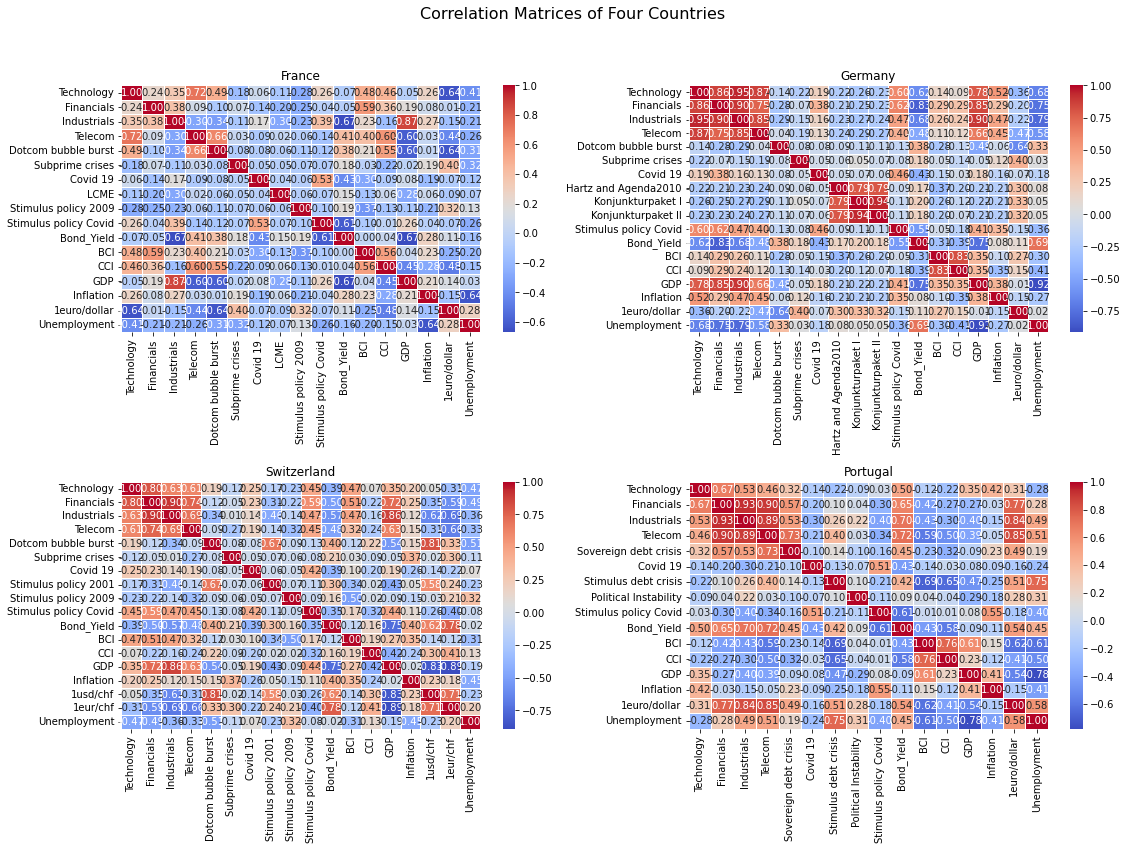

In [39]:
corr_france = france.corr()
corr_germany = germany.corr()
corr_switzerland = switzerland.corr()
corr_portugal = portugal.corr()

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Correlation Matrices of Four Countries", fontsize=16)

sns.heatmap(corr_france, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axs[0, 0])
axs[0, 0].set_title('France')

sns.heatmap(corr_germany, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axs[0, 1])
axs[0, 1].set_title('Germany')

sns.heatmap(corr_switzerland, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axs[1, 0])
axs[1, 0].set_title('Switzerland')

sns.heatmap(corr_portugal, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axs[1, 1])
axs[1, 1].set_title('Portugal')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [40]:
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)

def regression_pays(df, country_name, indices, control_var):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()
    fig.suptitle(f'Polynomial Regression of Indices in {country_name}', fontsize=16)

    for i, index in enumerate(indices):
        X = df[control_var].values
        y = df[index].values

        X_poly = poly.fit_transform(X)

        poly_reg = LinearRegression()
        poly_reg.fit(X_poly, y)

        y_pred = poly_reg.predict(X_poly)

        dates = df.index
        axs[i].plot(dates, y, color='blue', label='Real data')
        axs[i].plot(dates, y_pred, color='green', label=f'Polynomial regression (degree {poly_degree})')
        axs[i].set_title(index)
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('Market Index')
        axs[i].legend()
        axs[i].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

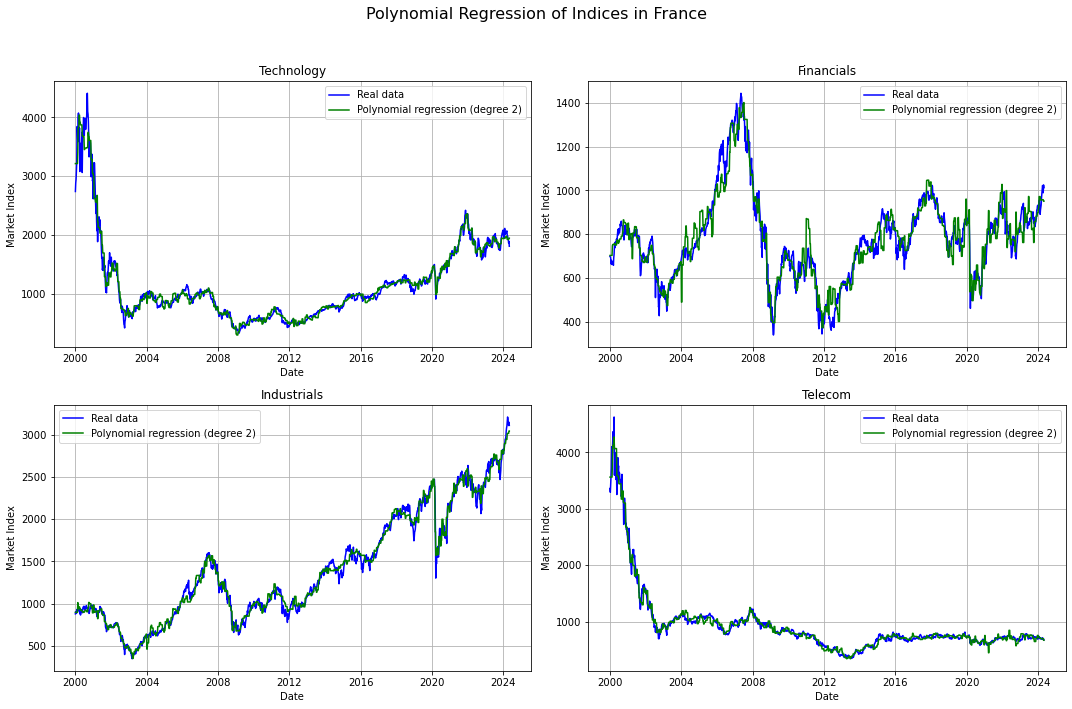

In [41]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']

control_var_france = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'LCME', 'Stimulus policy 2009', 'Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
regression_pays(france, 'France', indices, control_var_france)

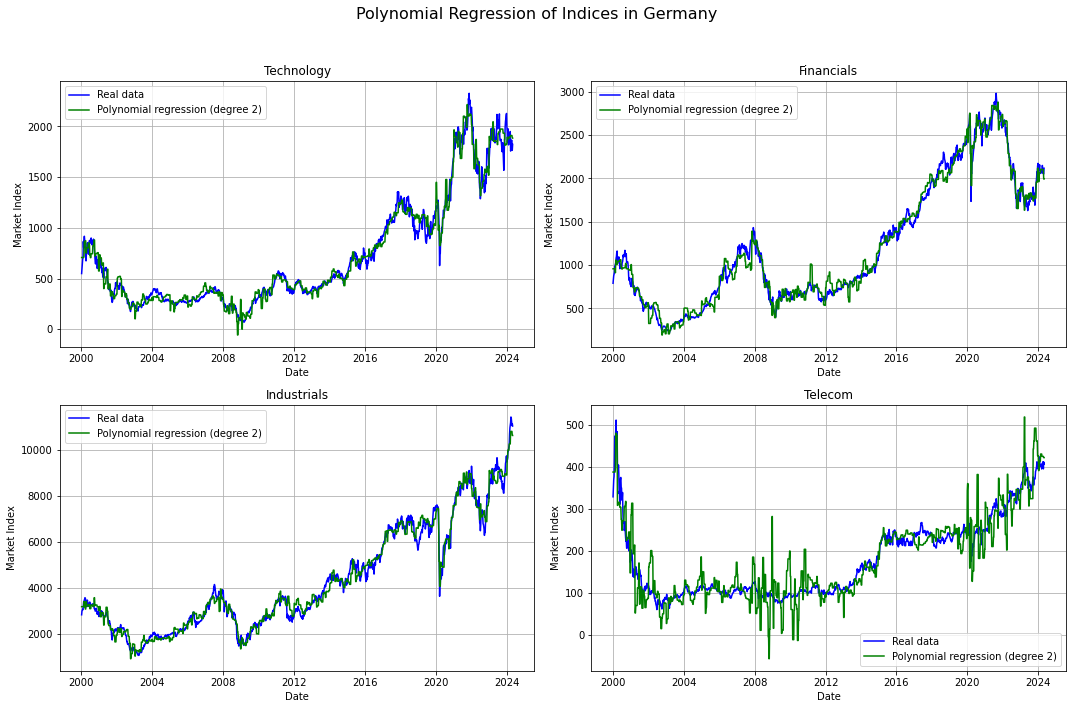

In [42]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']

control_var_germany = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'Hartz and Agenda2010', 'Konjunkturpaket I','Konjunkturpaket II','Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
regression_pays(germany, 'Germany', indices, control_var_germany)

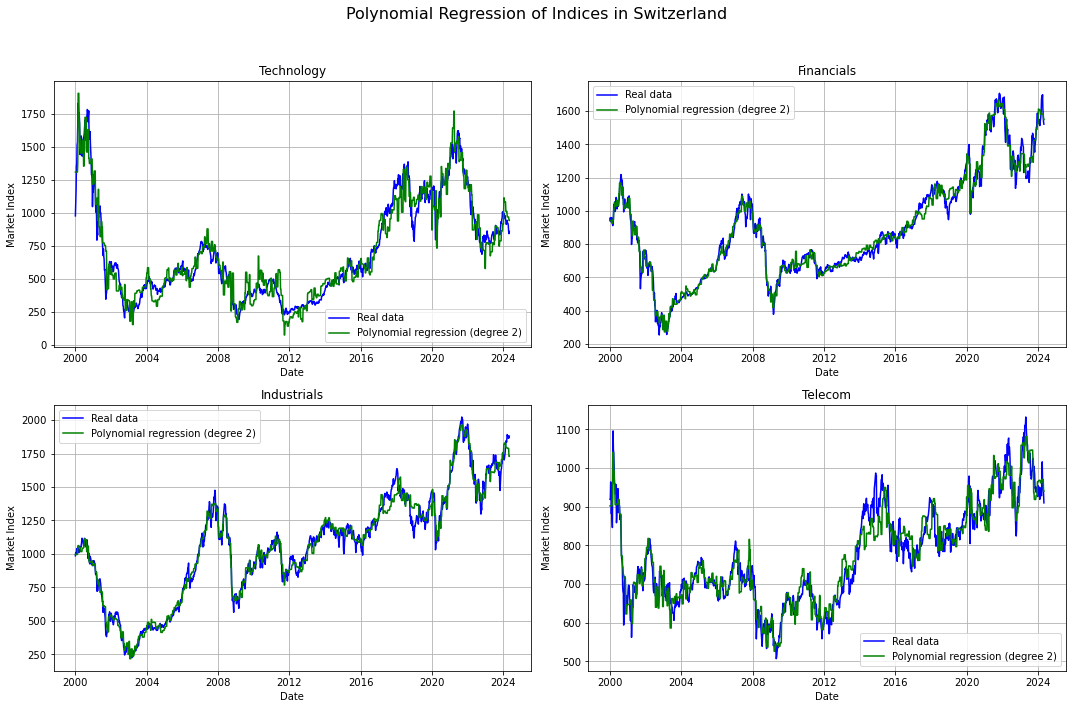

In [43]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']

control_var_switzerland = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'Stimulus policy 2001', 'Stimulus policy 2009','Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1usd/chf','1eur/chf','Unemployment']
regression_pays(switzerland, 'Switzerland', indices, control_var_switzerland)

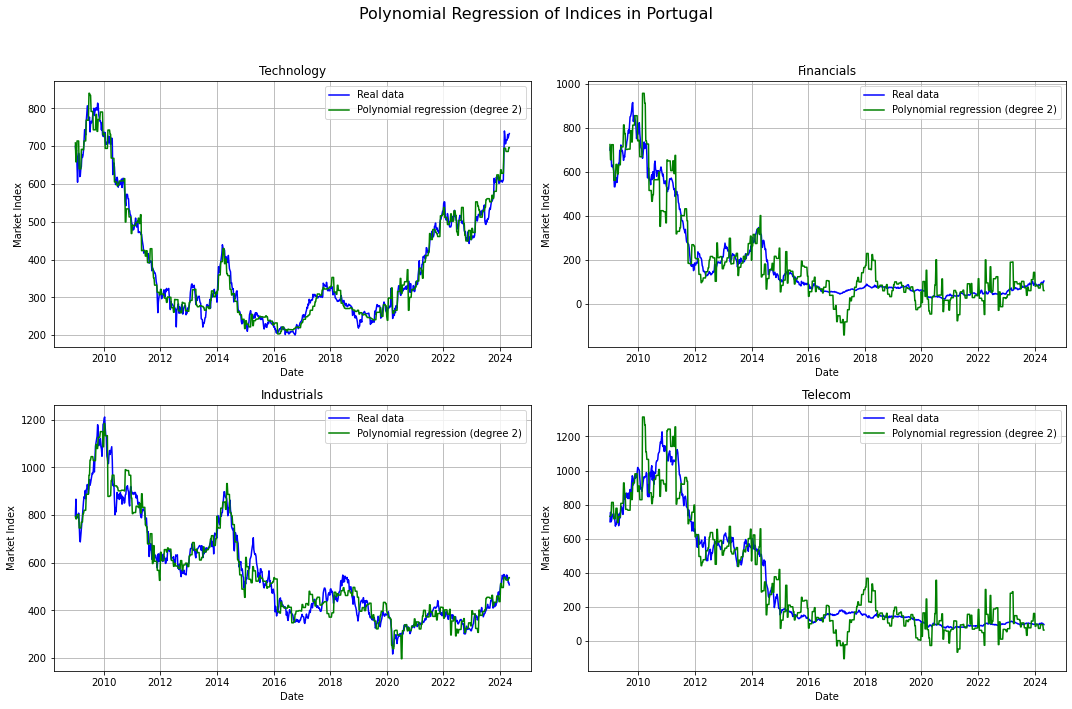

In [44]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']

control_var_portugal = ['Sovereign debt crisis', 'Covid 19', 'Stimulus debt crisis', 'Political Instability','Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
regression_pays(portugal, 'Portugal', indices, control_var_portugal)

In [45]:
binary_vars = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'LCME', 'Stimulus policy 2009', 'Stimulus policy Covid'] 
macro_vars = ['Technology', 'Financials', 'Industrials', 'Telecom','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']

scaler = StandardScaler()
normalized_macro = scaler.fit_transform(france[macro_vars])

import pandas as pd

normalized_macro_france = pd.DataFrame(normalized_macro, columns=macro_vars, index=france.index)

france_normalized = pd.concat([france[binary_vars], normalized_macro_france], axis=1)

In [46]:
binary_vars = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'Hartz and Agenda2010', 'Konjunkturpaket I','Konjunkturpaket II','Stimulus policy Covid']
macro_vars = ['Technology', 'Financials', 'Industrials', 'Telecom','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']

scaler = StandardScaler()
normalized_macro = scaler.fit_transform(germany[macro_vars])

import pandas as pd

normalized_macro_germany = pd.DataFrame(normalized_macro, columns=macro_vars, index=germany.index)

germany_normalized = pd.concat([germany[binary_vars], normalized_macro_germany], axis=1)

In [47]:
binary_vars = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'Stimulus policy 2001', 'Stimulus policy 2009','Stimulus policy Covid']
macro_vars = ['Technology', 'Financials', 'Industrials', 'Telecom','Bond_Yield','BCI','CCI','GDP','Inflation','1usd/chf','1eur/chf','Unemployment']

scaler = StandardScaler()
normalized_macro = scaler.fit_transform(switzerland[macro_vars])

import pandas as pd

normalized_macro_switzerland = pd.DataFrame(normalized_macro, columns=macro_vars, index=switzerland.index)

switzerland_normalized = pd.concat([switzerland[binary_vars], normalized_macro_switzerland], axis=1)

In [48]:
binary_vars = ['Sovereign debt crisis', 'Covid 19', 'Stimulus debt crisis', 'Political Instability','Stimulus policy Covid']
macro_vars = ['Technology', 'Financials', 'Industrials', 'Telecom','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']

scaler = StandardScaler()
normalized_macro = scaler.fit_transform(portugal[macro_vars])

import pandas as pd

normalized_macro_portugal = pd.DataFrame(normalized_macro, columns=macro_vars, index=portugal.index)

portugal_normalized = pd.concat([portugal[binary_vars], normalized_macro_portugal], axis=1)

In [49]:
def svr_regression_split(df, country_name, indices, control_var, kernel='rbf', C=1.0, epsilon=0.1):
    train_df = df[df.index < '2020-01-01']
    test_df = df[df.index >= '2020-01-01']

    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_df[control_var])
    X_test = scaler.transform(test_df[control_var])

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()
    fig.suptitle(f'Support Vector Regression (SVR) for {country_name} Indices', fontsize=16)

    for i, index in enumerate(indices):
        y_train = train_df[index].values
        y_test = test_df[index].values

        svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
        svr.fit(X_train, y_train)

        y_train_pred = svr.predict(X_train)
        y_test_pred = svr.predict(X_test)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        print(f"Index: {index}")
        print(f"Training - MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
        print(f"Testing - MSE: {mse_test:.4f}, R²: {r2_test:.4f}\n")

        axs[i].plot(train_df.index, y_train, color='blue', label='Real data (train)')
        axs[i].plot(train_df.index, y_train_pred, color='red', label='SVR Prediction (train)')
        axs[i].plot(test_df.index, y_test, color='orange', label='Real data (test)')
        axs[i].plot(test_df.index, y_test_pred, color='green', label='SVR Prediction (test)')
        axs[i].set_title(index)
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('Market Index')
        axs[i].legend()
        axs[i].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Index: Technology
Training - MSE: 0.0298, R²: 0.9695
Testing - MSE: 0.9598, R²: -5.0340

Index: Financials
Training - MSE: 0.0817, R²: 0.9276
Testing - MSE: 0.3915, R²: -0.0029

Index: Industrials
Training - MSE: 0.0078, R²: 0.9855
Testing - MSE: 2.1733, R²: -6.3488

Index: Telecom
Training - MSE: 0.0254, R²: 0.9783
Testing - MSE: 0.5340, R²: -96.0712



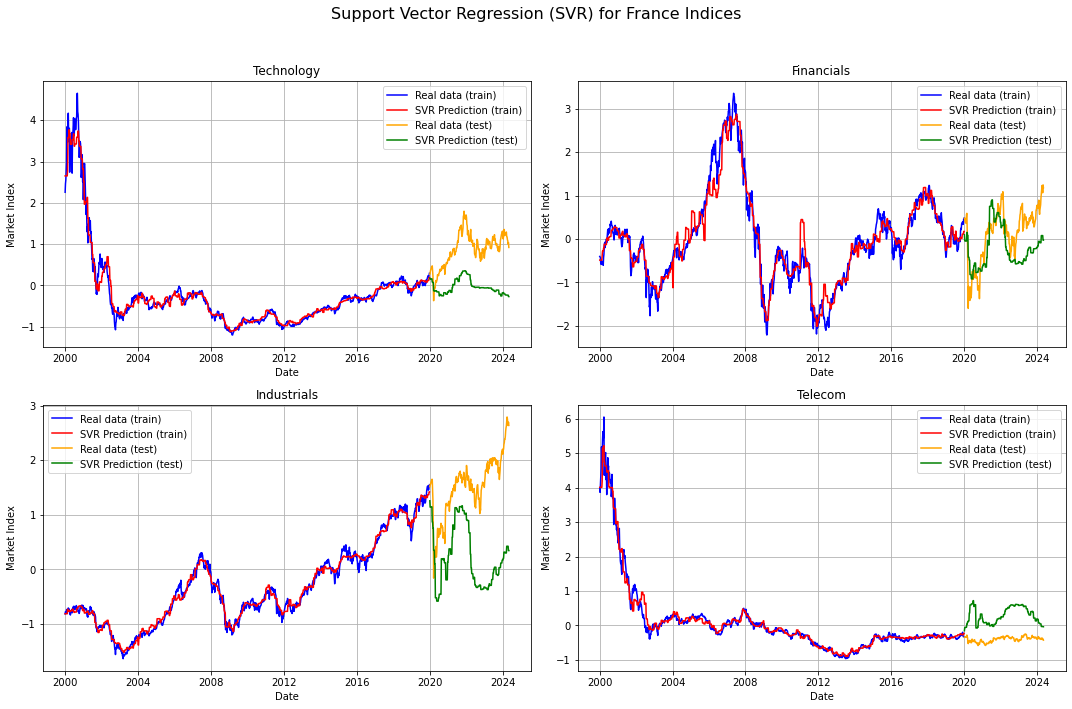

In [50]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']

control_var_france = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'LCME', 'Stimulus policy 2009', 'Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
svr_regression_split(france_normalized, 'France', indices, control_var_france)

Index: Technology
Training - MSE: 0.0080, R²: 0.9735
Testing - MSE: 4.4318, R²: -10.4540

Index: Financials
Training - MSE: 0.0096, R²: 0.9832
Testing - MSE: 2.0646, R²: -6.2170

Index: Industrials
Training - MSE: 0.0092, R²: 0.9812
Testing - MSE: 3.4692, R²: -7.8998

Index: Telecom
Training - MSE: 0.0568, R²: 0.9047
Testing - MSE: 2.4995, R²: -5.2388



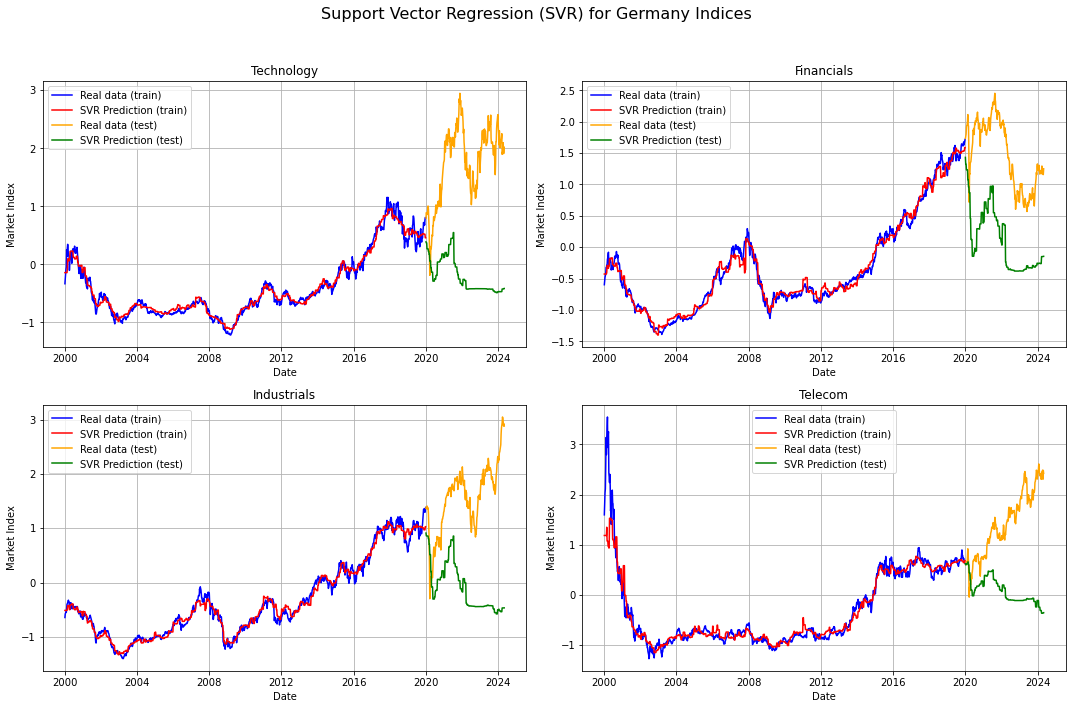

In [51]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var_germany = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'Hartz and Agenda2010', 'Konjunkturpaket I','Konjunkturpaket II','Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
svr_regression_split(germany_normalized, 'Germany', indices, control_var_germany)

Index: Technology
Training - MSE: 0.0364, R²: 0.9576
Testing - MSE: 0.8359, R²: -0.8004

Index: Financials
Training - MSE: 0.0152, R²: 0.9675
Testing - MSE: 2.7217, R²: -8.5418

Index: Industrials
Training - MSE: 0.0168, R²: 0.9751
Testing - MSE: 2.2662, R²: -6.6984

Index: Telecom
Training - MSE: 0.0989, R²: 0.8451
Testing - MSE: 2.4653, R²: -8.1781



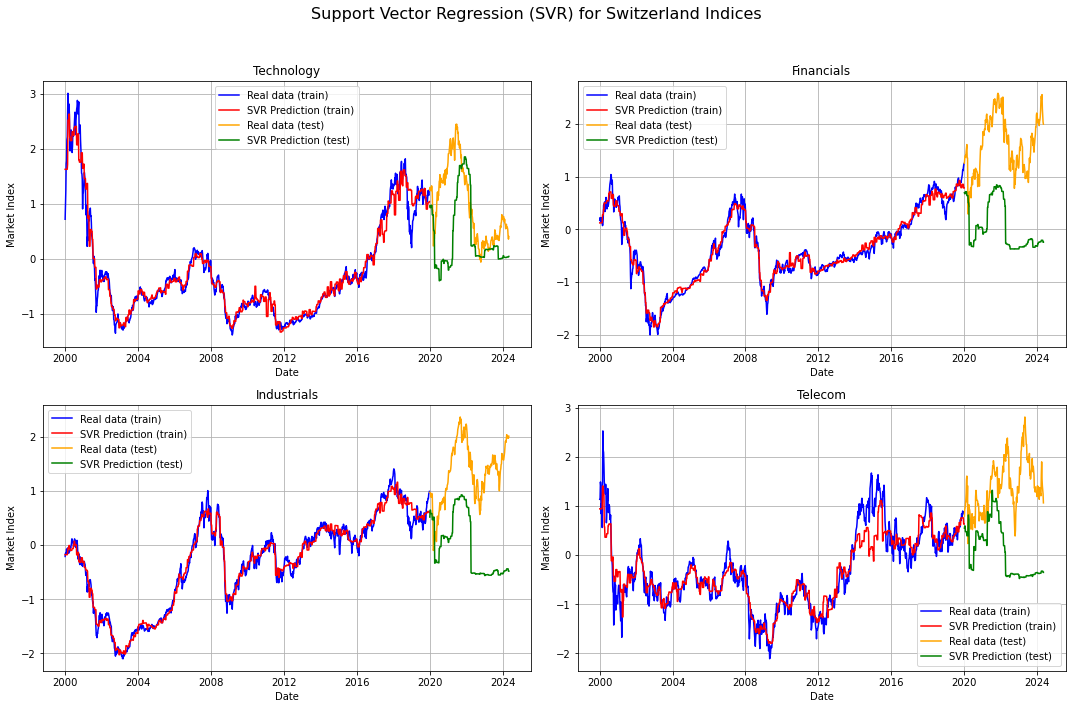

In [52]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var_switzerland = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'Stimulus policy 2001', 'Stimulus policy 2009','Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1usd/chf','1eur/chf','Unemployment']
svr_regression_split(switzerland_normalized, 'Switzerland', indices, control_var_switzerland)

Index: Technology
Training - MSE: 0.0127, R²: 0.9883
Testing - MSE: 0.6799, R²: -0.3402

Index: Financials
Training - MSE: 0.0130, R²: 0.9887
Testing - MSE: 1.4481, R²: -167.4698

Index: Industrials
Training - MSE: 0.0336, R²: 0.9653
Testing - MSE: 1.5245, R²: -16.5263

Index: Telecom
Training - MSE: 0.0109, R²: 0.9896
Testing - MSE: 1.8490, R²: -2139.9576



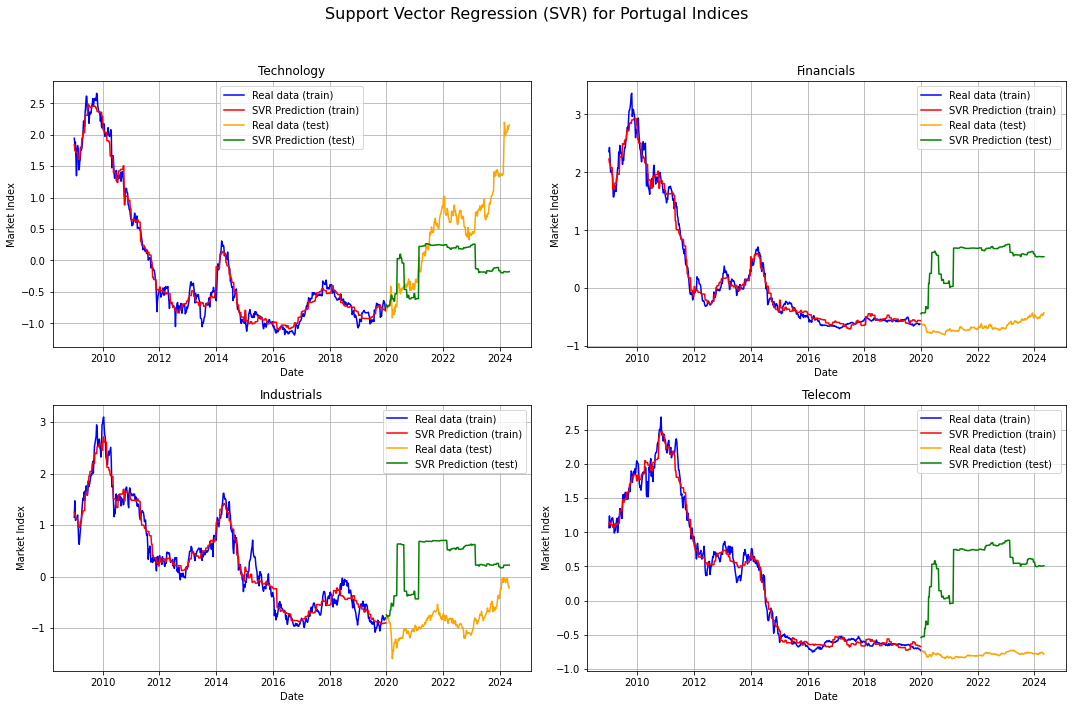

In [53]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var_portugal = ['Sovereign debt crisis', 'Covid 19', 'Stimulus debt crisis', 'Political Instability','Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
svr_regression_split(portugal_normalized, 'Portugal', indices, control_var_portugal)

In [54]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def grid_search_svr_feature_selection(df, indices, control_vars, param_grid, test_size=0.3, random_state=42):
    X = df[control_vars].values
    scaler = StandardScaler()

    results = {}

    for index in indices:
        y = df[index].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        svr = SVR()

        grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_
        print(f"Best parameters {index} : {best_params}")

        best_svr = grid_search.best_estimator_
        best_svr.fit(X_train, y_train)

        y_train_pred = best_svr.predict(X_train)
        y_test_pred = best_svr.predict(X_test)

        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)

        results[index] = {
            'best_params': best_params,
            'mse_train': mse_train,
            'mse_test': mse_test}

        if best_params['kernel'] == 'linear':
            feature_weights = best_svr.coef_.flatten()
            sorted_indices = sorted(range(len(control_vars)), key=lambda k: abs(feature_weights[k]), reverse=True)
            important_vars = [control_vars[i] for i in sorted_indices]
            results[index]['important_vars'] = important_vars

            print(f"Variables importantes pour {index} : {important_vars}")

    return results

param_grid = {'C': [0.1, 1, 10],'epsilon': [0.01, 0.1, 0.2],'kernel': ['linear', 'rbf']}

In [55]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var_france = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'LCME', 'Stimulus policy 2009', 'Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
results = grid_search_svr_feature_selection(france_normalized, indices, control_var_france, param_grid)

Best parameters Technology : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Financials : {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best parameters Industrials : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Telecom : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}


In [56]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var_germany = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'Hartz and Agenda2010', 'Konjunkturpaket I','Konjunkturpaket II','Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
results = grid_search_svr_feature_selection(germany_normalized, indices, control_var_germany, param_grid)

Best parameters Technology : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Financials : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Industrials : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Telecom : {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}


In [57]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var_switzerland = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'Stimulus policy 2001', 'Stimulus policy 2009','Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1usd/chf','1eur/chf','Unemployment']
results = grid_search_svr_feature_selection(switzerland_normalized, indices, control_var_switzerland, param_grid)

Best parameters Technology : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Financials : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Industrials : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Telecom : {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}


In [58]:
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
control_var_portugal = ['Sovereign debt crisis', 'Covid 19', 'Stimulus debt crisis', 'Political Instability','Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
results = grid_search_svr_feature_selection(portugal_normalized, indices, control_var_portugal, param_grid)

Best parameters Technology : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Financials : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Industrials : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best parameters Telecom : {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}


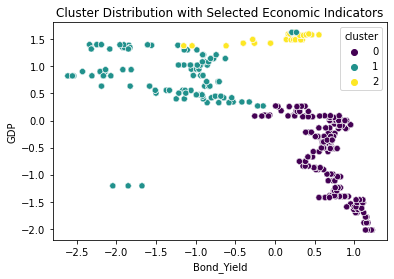

In [59]:

from sklearn.cluster import KMeans

selected_features = ['Bond_Yield', 'GDP', 'Inflation']
kmeans = KMeans(n_clusters=3, random_state=42)
france_normalized['cluster'] = kmeans.fit_predict(france_normalized[selected_features])

sns.scatterplot(x='Bond_Yield', y='GDP', hue='cluster', data=france_normalized, palette='viridis')
plt.title('Cluster Distribution with Selected Economic Indicators')
plt.show()

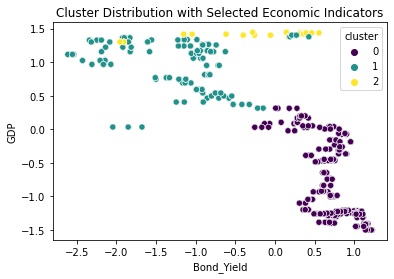

In [60]:
selected_features = ['Bond_Yield', 'GDP', 'Inflation']
kmeans = KMeans(n_clusters=3, random_state=42)
germany_normalized['cluster'] = kmeans.fit_predict(germany_normalized[selected_features])

sns.scatterplot(x='Bond_Yield', y='GDP', hue='cluster', data=germany_normalized, palette='viridis')
plt.title('Cluster Distribution with Selected Economic Indicators')
plt.show()


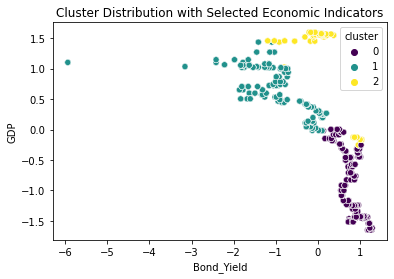

In [61]:
from sklearn.cluster import KMeans

selected_features = ['Bond_Yield', 'GDP', 'Inflation']
kmeans = KMeans(n_clusters=3, random_state=42)
switzerland_normalized['cluster'] = kmeans.fit_predict(switzerland_normalized[selected_features])

sns.scatterplot(x='Bond_Yield', y='GDP', hue='cluster', data=switzerland_normalized, palette='viridis')
plt.title('Cluster Distribution with Selected Economic Indicators')
plt.show()

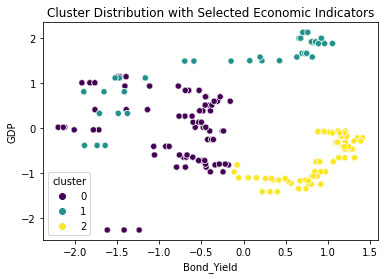

In [62]:
from sklearn.cluster import KMeans

selected_features = ['Bond_Yield', 'GDP', 'Inflation']
kmeans = KMeans(n_clusters=3, random_state=42)
portugal_normalized['cluster'] = kmeans.fit_predict(portugal_normalized[selected_features])

sns.scatterplot(x='Bond_Yield', y='GDP', hue='cluster', data=portugal_normalized, palette='viridis')
plt.title('Cluster Distribution with Selected Economic Indicators')
plt.show()

In [63]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def svr_regression_split(df, country_name, indices, control_var, best_params):
    if 'cluster' not in df.columns:
        print("La colonne 'cluster' est manquante dans le DataFrame.")
        return  # Arrête l'exécution si 'cluster' est manquant

    control_var = control_var + ['cluster']
    train_df = df[df.index < '2020-01-01']
    test_df = df[df.index >= '2020-01-01']
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_df[control_var])
    X_test = scaler.transform(test_df[control_var])

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    axs = axs.flatten()
    fig.suptitle(f'Support Vector Regression (SVR) for {country_name} Indices', fontsize=16)

    for i, index in enumerate(indices):
        y_train = train_df[index].values
        y_test = test_df[index].values
        svr = SVR(kernel=best_params[index]['kernel'], C=best_params[index]['C'], epsilon=best_params[index]['epsilon'])
        svr.fit(X_train, y_train)
        y_train_pred = svr.predict(X_train)
        y_test_pred = svr.predict(X_test)

        axs[i].plot(train_df.index, y_train, color='blue', label='Real data (train)')
        axs[i].plot(train_df.index, y_train_pred, color='red', label='SVR Prediction (train)')
        axs[i].plot(test_df.index, y_test, color='orange', label='Real data (test)')
        axs[i].plot(test_df.index, y_test_pred, color='green', label='SVR Prediction (test)')
        axs[i].set_title(index)
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('Market Index')
        axs[i].legend()
        axs[i].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

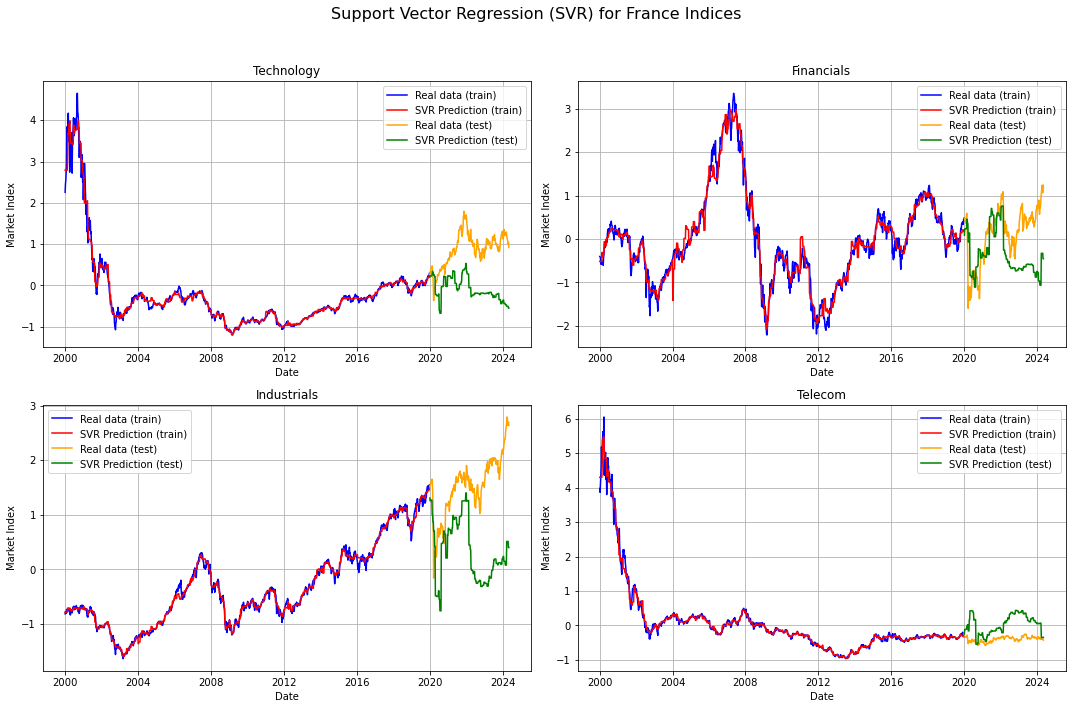

In [64]:
best_params = {
    'Technology': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Financials': {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'},
    'Industrials': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Telecom': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
}

svr_regression_split(france_normalized, 'France', indices, control_var_france, best_params)

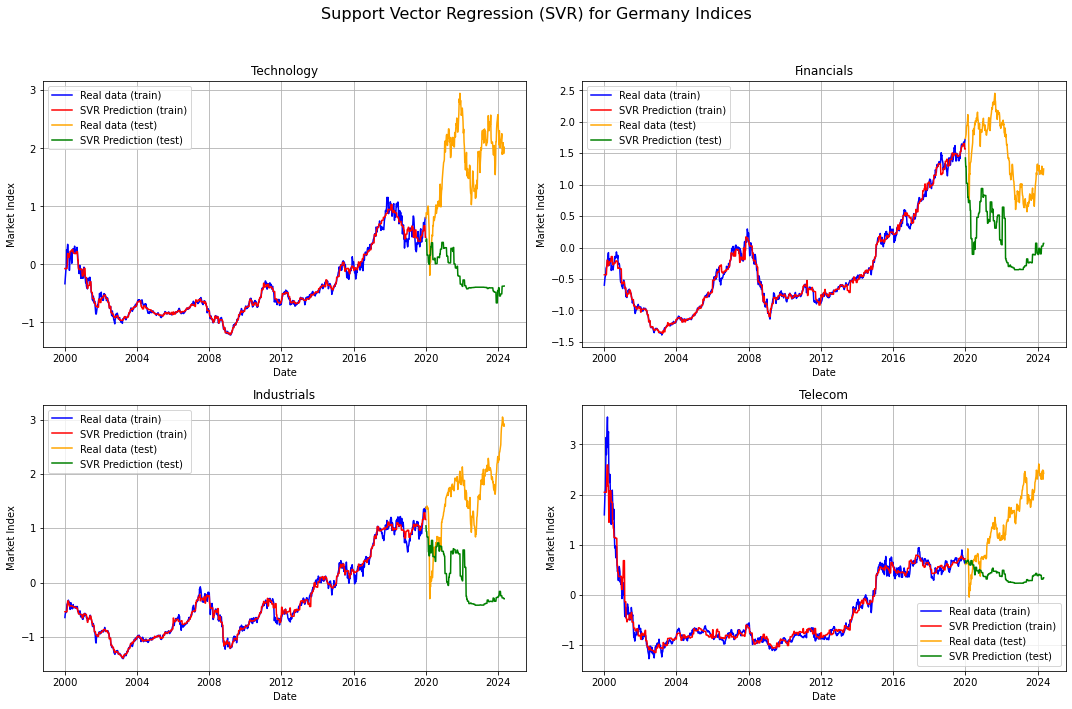

In [65]:
best_params = {
    'Technology': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Financials': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Industrials': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Telecom': {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
}

svr_regression_split(germany_normalized, 'Germany', indices, control_var_germany, best_params)

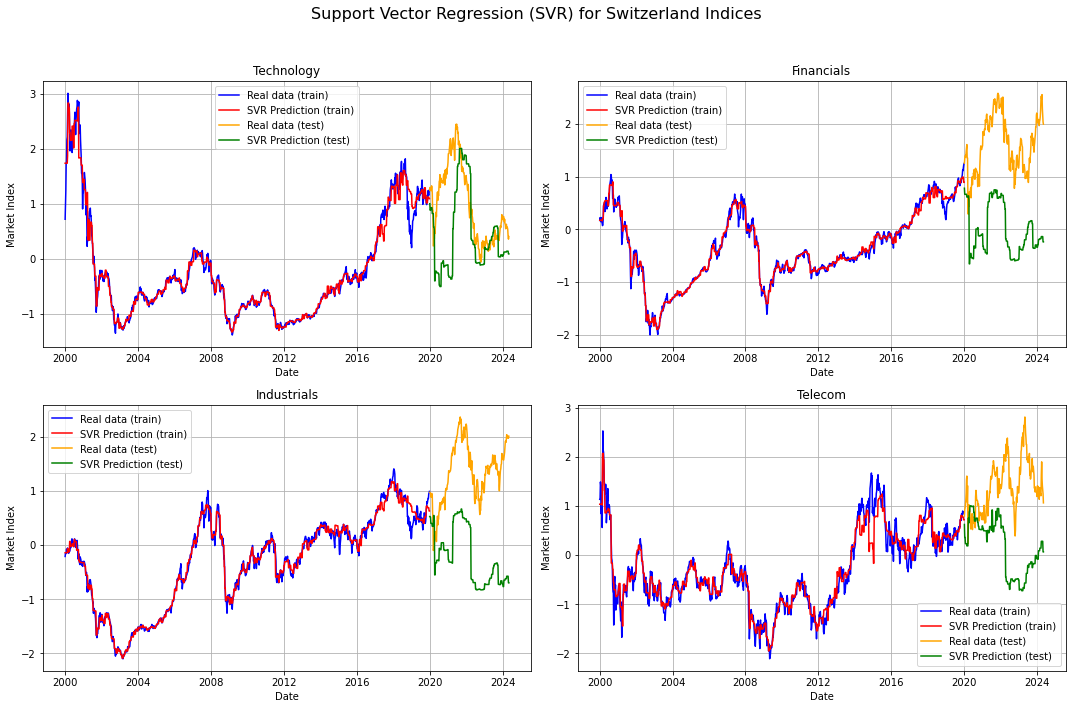

In [66]:
best_params = {
    'Technology': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Financials': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Industrials': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Telecom': {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
}

svr_regression_split(switzerland_normalized, 'Switzerland', indices, control_var_switzerland, best_params)

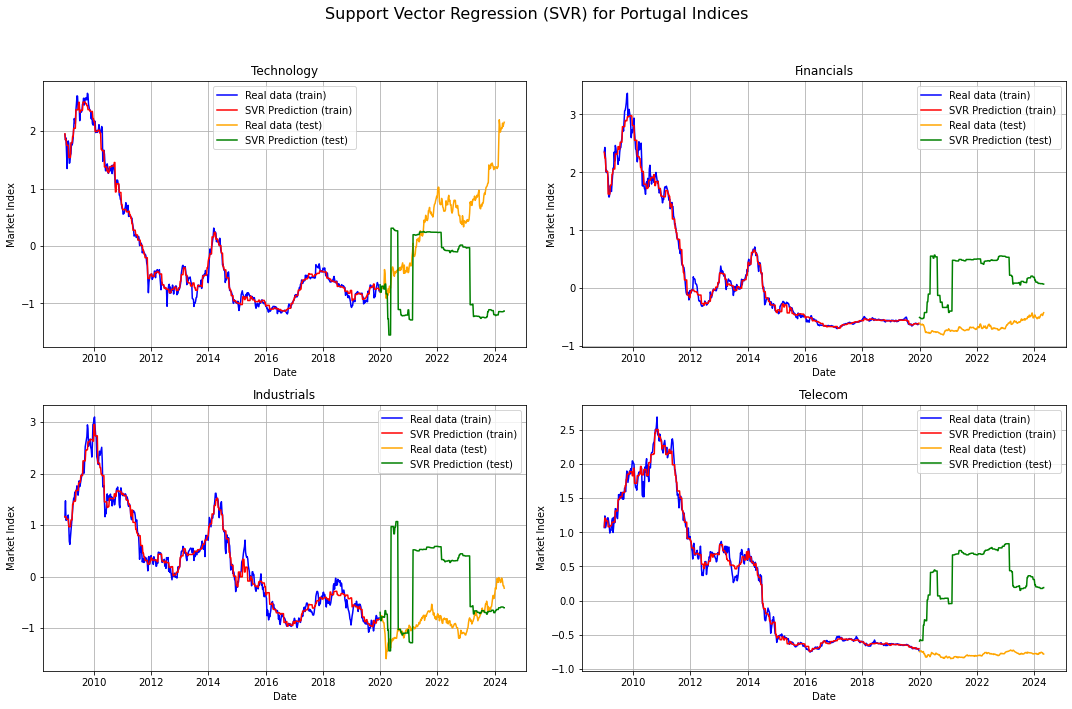

In [67]:
best_params = {
    'Technology': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Financials': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Industrials': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'},
    'Telecom': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
}

svr_regression_split(portugal_normalized, 'Portugal', indices, control_var_portugal, best_params)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def random_forest_enhanced(df, indices, control_var):
    results = {}
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    
    train_df = df[df.index < '2020-01-01']
    test_df = df[df.index >= '2020-01-01']
    X_train = train_df[control_var]
    X_test = test_df[control_var]

    for index in indices:
        y_train = train_df[index]
        y_test = test_df[index]
        
        rf = RandomForestRegressor(random_state=42)
        grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)

        best_rf = grid_search.best_estimator_
        y_pred = best_rf.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        feature_importances = best_rf.feature_importances_

        results[index] = {
            'MSE': mse,
            'Best Params': grid_search.best_params_,
            'Feature Importances': feature_importances
        }
        print(f"Results for {index}: {results[index]}")
    
    return results


In [69]:
rf_results = random_forest_enhanced(france, indices, control_var_france)

Results for Technology: {'MSE': 617708.0716303893, 'Best Params': {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}, 'Feature Importances': array([3.17320051e-04, 1.19268747e-05, 0.00000000e+00, 1.81368621e-04,
       5.83513777e-04, 0.00000000e+00, 1.02327450e-02, 3.15080105e-02,
       2.86252082e-01, 6.21864938e-01, 4.42118782e-03, 4.18653311e-02,
       2.76157555e-03])}
Results for Financials: {'MSE': 13881.776440440028, 'Best Params': {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}, 'Feature Importances': array([9.69694937e-05, 5.10068859e-03, 0.00000000e+00, 1.09985812e-04,
       2.55729412e-04, 0.00000000e+00, 6.15884867e-02, 4.67477080e-01,
       6.08458980e-02, 1.57888839e-01, 2.98167056e-02, 1.71118629e-01,
       4.57009879e-02])}
Results for Industrials: {'MSE': 166780.42820226727, 'Best Params': {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}, 'Feature Importances': array([7.77888408e-06, 2.21289403e-05, 0.00000000e+00, 4.3750

In [70]:
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestRegressor

def train_optimal_models(df, indices, control_var, best_params):
    models = {}
    feature_importances = {}
    X = df[control_var]
    
    # Préparer un grand graphique pour toutes les prédictions
    fig, axs = plt.subplots(len(indices), 1, figsize=(10, len(indices) * 5))
    if len(indices) == 1:
        axs = [axs]  # Convertir en liste si un seul index

    for i, index in enumerate(indices):
        y = df[index]
        
        # Création du modèle avec les meilleurs paramètres
        rf = RandomForestRegressor(
            n_estimators=best_params[index]['n_estimators'],
            max_depth=best_params[index]['max_depth'],
            min_samples_split=best_params[index]['min_samples_split'],
            random_state=42
        )
        
        # Entraînement du modèle
        rf.fit(X, y)
        
        # Sauvegarde du modèle entraîné pour une utilisation ultérieure
        model_path = f'random_forest_france_{index}.joblib'
        joblib.dump(rf, model_path)
        print(f"Model for {index} saved to {model_path}")
        
        # Prédiction sur les données d'entrée
        y_pred = rf.predict(X)
        
        # Stocker les importances des caractéristiques
        feature_importances[index] = rf.feature_importances_
        
        # Tracé des résultats de prédiction
        axs[i].plot(df.index, y, label='Real Data', color='blue')
        axs[i].plot(df.index, y_pred, label='Predicted Data', color='red')
        axs[i].set_title(f'Random Forest Prediction vs Real Data for {index}')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(index)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

    # Tracer l'importance des caractéristiques pour chaque indice dans un nouveau graphique
    fig, axs = plt.subplots(len(indices), 1, figsize=(10, len(indices) * 5))
    if len(indices) == 1:
        axs = [axs]
    
    for i, index in enumerate(indices):
        axs[i].bar(control_var, feature_importances[index], color='teal')
        axs[i].set_title(f'Feature Importances for {index}')
        axs[i].set_ylabel('Importance')
        axs[i].set_xlabel('Features')
        axs[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    return models


Model for Technology saved to random_forest_france_Technology.joblib
Model for Financials saved to random_forest_france_Financials.joblib
Model for Industrials saved to random_forest_france_Industrials.joblib
Model for Telecom saved to random_forest_france_Telecom.joblib


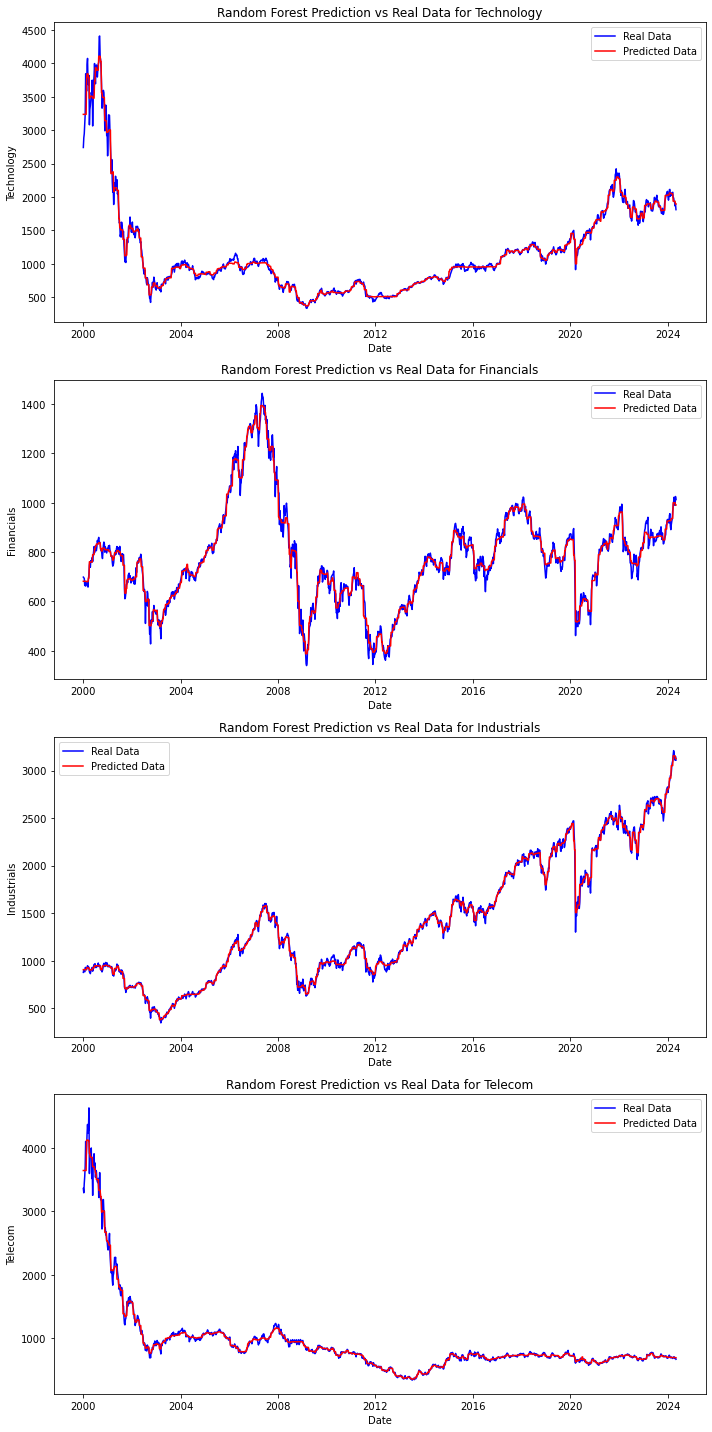

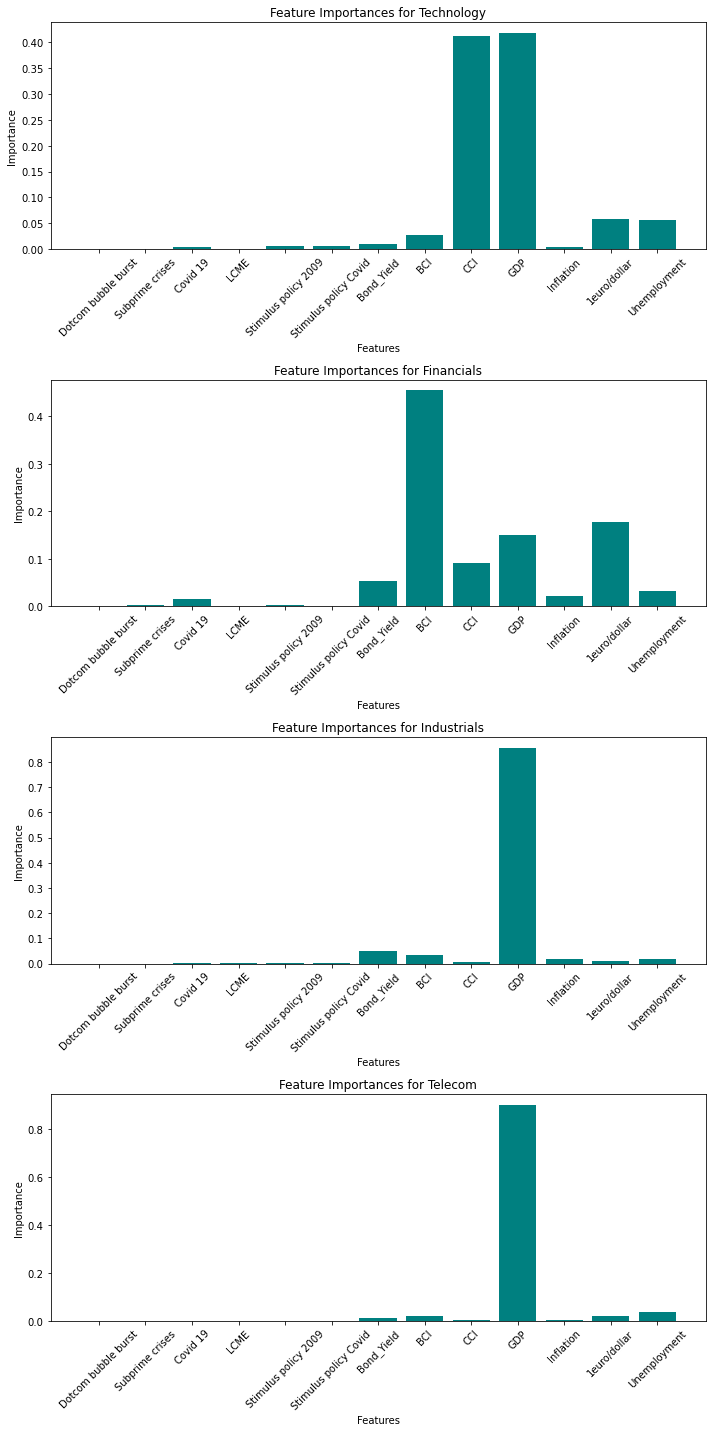

{}

In [71]:
best_params = {
    'Technology': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10},
    'Financials': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10},
    'Industrials': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5},
    'Telecom': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10}}

control_var_france = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'LCME', 'Stimulus policy 2009', 'Stimulus policy Covid','Bond_Yield','BCI','CCI','GDP','Inflation','1euro/dollar','Unemployment']
train_optimal_models(france,indices, control_var_france, best_params)

In [72]:
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestRegressor

def train_test_split_models(df, indices, control_vars, best_params, split_year="2020-01-01"):
    models = {}
    feature_importances = {}
    
    # Diviser les données en ensembles d'entraînement et de test
    train_df = df[df.index < split_year]
    test_df = df[df.index >= split_year]

    # Préparer les graphiques pour les prédictions
    fig, axs = plt.subplots(len(indices), 1, figsize=(10, len(indices) * 5))
    if len(indices) == 1:
        axs = [axs]  # Convertir en liste si un seul indice

    for i, index in enumerate(indices):
        X_train = train_df[control_vars]
        y_train = train_df[index]
        X_test = test_df[control_vars]
        y_test = test_df[index]
        
        # Création du modèle avec les meilleurs paramètres spécifiés
        rf = RandomForestRegressor(
            n_estimators=best_params[index]['n_estimators'],
            max_depth=best_params[index]['max_depth'],
            min_samples_split=best_params[index]['min_samples_split'],
            random_state=42
        )
        
        # Entraînement du modèle
        rf.fit(X_train, y_train)
        
        # Stockage du modèle dans le dictionnaire
        models[index] = rf
        
        # Prédiction sur les ensembles d'entraînement et de test
        y_train_pred = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)
        
        # Stocker les importances des caractéristiques
        feature_importances[index] = rf.feature_importances_
        
        # Tracer les résultats de prédiction
        axs[i].plot(train_df.index, y_train, label='Real Train Data', color='blue')
        axs[i].plot(train_df.index, y_train_pred, label='Predicted Train Data', color='red')
        axs[i].plot(test_df.index, y_test, label='Real Test Data', color='green')
        axs[i].plot(test_df.index, y_test_pred, label='Predicted Test Data', color='orange')
        axs[i].set_title(f'Random Forest Prediction vs Real Data for {index}')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(index)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

    # Tracer l'importance des caractéristiques pour chaque indice
    fig, axs = plt.subplots(len(indices), 1, figsize=(10, len(indices) * 5))
    if len(indices) == 1:
        axs = [axs]
    
    for i, index in enumerate(indices):
        axs[i].bar(control_vars, feature_importances[index], color='teal')
        axs[i].set_title(f'Feature Importances for {index}')
        axs[i].set_ylabel('Importance')
        axs[i].set_xlabel('Features')
        axs[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    return models


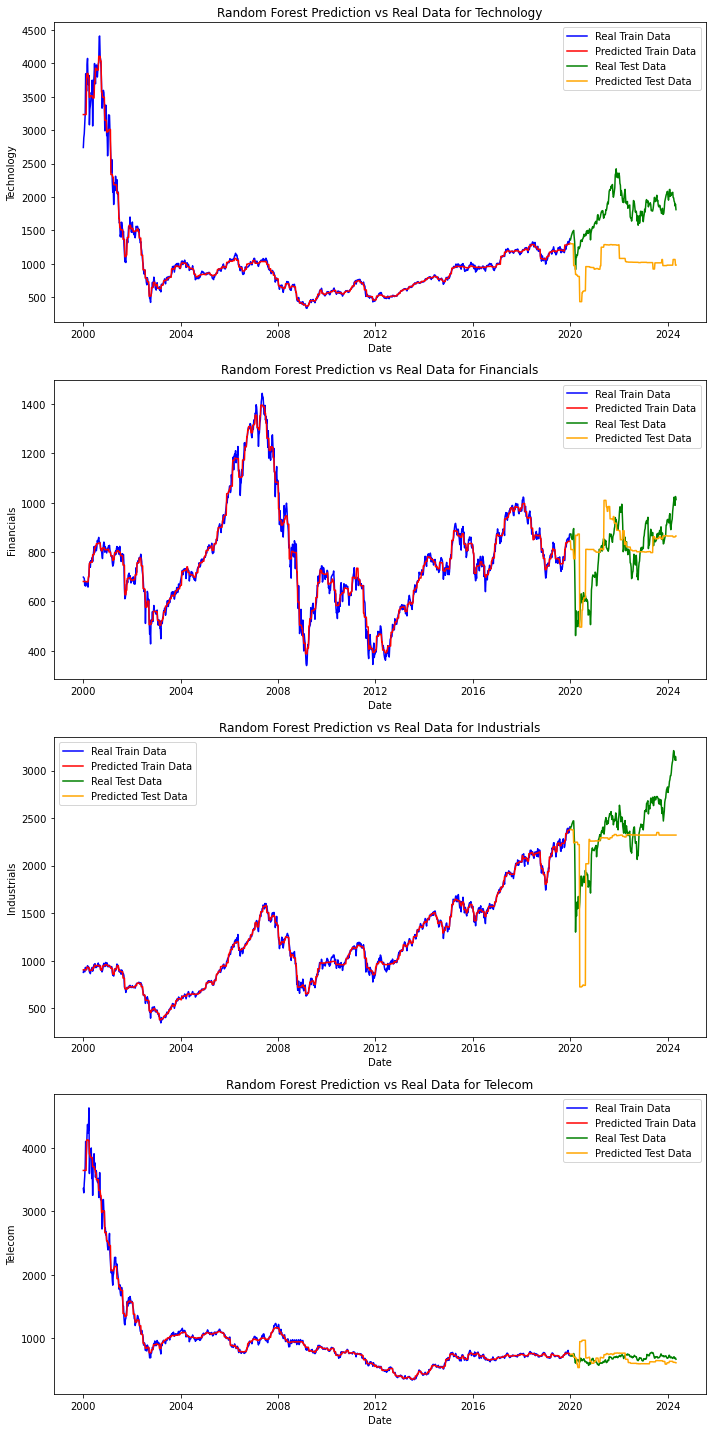

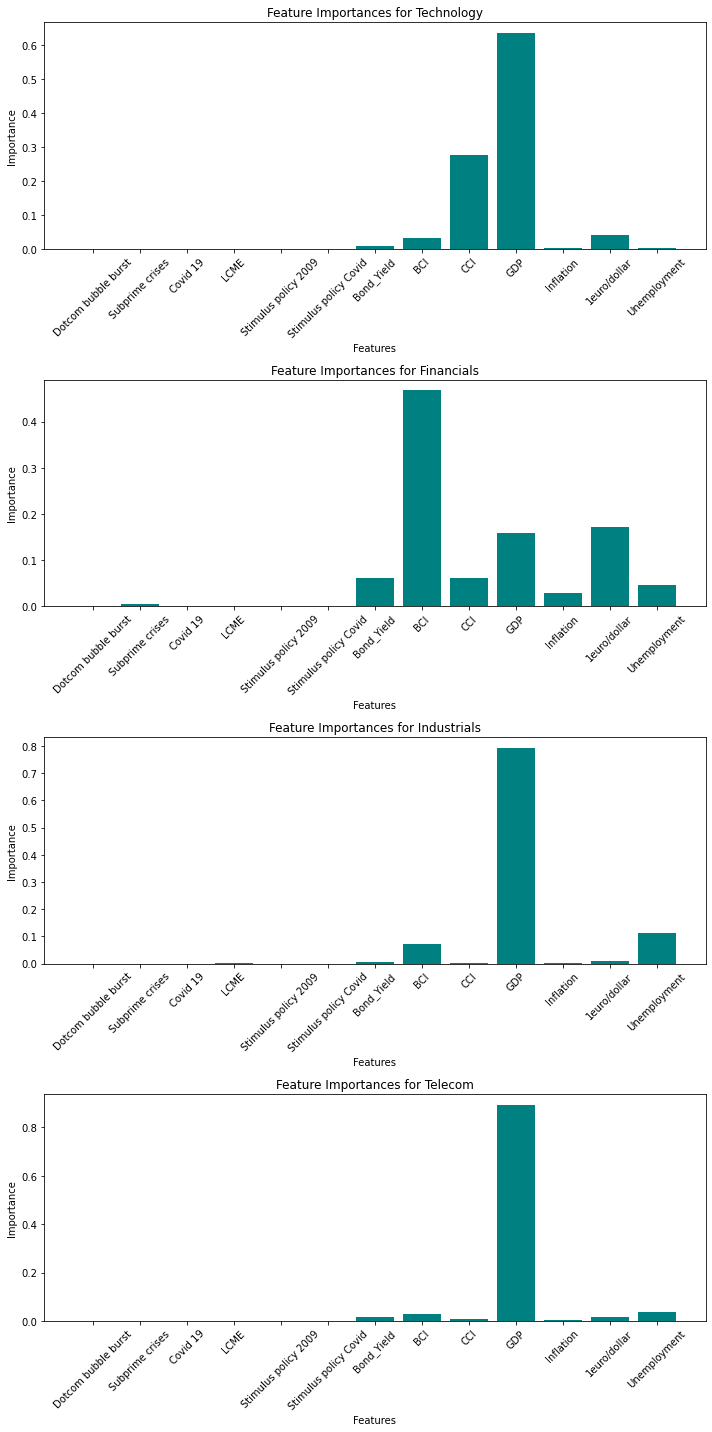

{'Technology': RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42),
 'Financials': RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42),
 'Industrials': RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42),
 'Telecom': RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)}

In [73]:
best_params = {
    'Technology': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10},
    'Financials': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10},
    'Industrials': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5},
    'Telecom': {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 10}}
train_test_split_models(france, indices, control_var_france, best_params, split_year="2020-01-01")

In [74]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

def predict_sarima(series, order, seasonal_order, steps):
    optimization_methods = ['lbfgs', 'powell', 'cg', 'nm']
    for method in optimization_methods:
        try:
            model = SARIMAX(series, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False, maxiter=500, method=method)
            forecast = model_fit.forecast(steps=steps)
            return forecast
        except Exception as e:
            print(f"Optimization with method {method} failed: {e}")
    raise ValueError("SARIMA model failed to converge with all methods")

def extend_dataframe_with_sarima(df, end_date, variables, sarima_configs):
    last_date = df.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(weeks=1), end=end_date, freq='W')
    future_data = pd.DataFrame(index=future_dates)
    
    for variable, config in zip(variables, sarima_configs):
        series = df[variable].asfreq('W', method='ffill')
        forecasted_values = predict_sarima(series, config['order'], config['seasonal_order'], len(future_dates))
        future_data[variable] = forecasted_values

    extended_df = pd.concat([df, future_data])

    binary_vars = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'LCME', 'Stimulus policy 2009', 'Stimulus policy Covid']
    for var in binary_vars:
        last_value = df[var].iloc[-1]
        extended_df[var] = extended_df[var].fillna(last_value)

    return extended_df

# Assuming `france` is a predefined DataFrame
sarima_vars = ['BCI', 'CCI', '1euro/dollar', 'GDP', 'Inflation', 'Bond_Yield', 'Unemployment']
sarima_configs = [
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 52)},  # BCI
    {'order': (1, 0, 1), 'seasonal_order': (1, 0, 1, 52)},  # CCI
    {'order': (0, 1, 1), 'seasonal_order': (0, 1, 1, 52)},  # 1euro/dollar
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 52)},  # GDP
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 52)},  # Inflation
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 52)},  # Bond_Yield
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 52)},  # Unemployment
]

# Extend data until 2027
france_extended = extend_dataframe_with_sarima(france, '2027-12-31', sarima_vars, sarima_configs)
france_extended = france_extended.drop(france_extended.index[-1])

print(france_extended.head())
print(france_extended.tail())


            Technology  Financials  Industrials  Telecom  Dotcom bubble burst  \
2000-01-05     2740.51      698.46       878.27  3359.12                  0.0   
2000-01-12     2885.28      695.45       904.79  3291.45                  0.0   
2000-01-19     2947.03      693.11       897.09  3441.69                  0.0   
2000-01-26     3105.61      664.40       884.02  3551.42                  0.0   
2000-02-02     3237.34      680.74       927.36  3712.27                  0.0   

            Subprime crises  Covid 19  LCME  Stimulus policy 2009  \
2000-01-05              0.0       0.0   0.0                   0.0   
2000-01-12              0.0       0.0   0.0                   0.0   
2000-01-19              0.0       0.0   0.0                   0.0   
2000-01-26              0.0       0.0   0.0                   0.0   
2000-02-02              0.0       0.0   0.0                   0.0   

            Stimulus policy Covid  Bond_Yield       BCI       CCI       GDP  \
2000-01-05         

In [75]:
import pandas as pd
import numpy as np

def apply_annual_growth_to_gdp(df, start_date, end_years, growth_rate):
    current_date = start_date
    for year in range(1, end_years + 1):
        next_date = pd.Timestamp(f'{start_date.year + year}-05-01')
        # Get the last value before the next_date
        last_value = df['GDP'].loc[current_date]
        # Calculate the new value with the growth rate
        new_value = last_value * (1 + growth_rate)
        # Ensure the projection date exists in the DataFrame
        df = df.reindex(df.index.union([next_date]))
        df.loc[next_date, 'GDP'] = new_value
        current_date = next_date
    # Interpolate the values for the intermediate weeks
    df['GDP'] = df['GDP'].interpolate(method='linear')
    return df

# Date de départ pour la projection
start_date = pd.Timestamp('2024-05-01')
end_years = 3  # Projections jusqu'à 2027

# Taux de croissance pour chaque scénario
growth_rate_optimist = 0.05
growth_rate_pessimist = 0.02
growth_rate_neutral = 0.00

# Cloning the dataframes
france_extended_optimist = france_extended.copy()
france_extended_pessimist = france_extended.copy()
france_extended_neutral = france_extended.copy()

# Applying growth rates
france_extended_optimist = apply_annual_growth_to_gdp(france_extended_optimist, start_date, end_years, growth_rate_optimist)
france_extended_pessimist = apply_annual_growth_to_gdp(france_extended_pessimist, start_date, end_years, growth_rate_pessimist)
france_extended_neutral = apply_annual_growth_to_gdp(france_extended_neutral, start_date, end_years, growth_rate_neutral)

print("Optimist Scenario - Last 100 rows:")
print(france_extended_optimist.tail(100))

print("Pessimist Scenario - Last 100 rows:")
print(france_extended_pessimist.tail(100))

print("Neutral Scenario - Last 100 rows:")
print(france_extended_neutral.tail(100))


Optimist Scenario - Last 100 rows:
            Technology  Financials  Industrials  Telecom  Dotcom bubble burst  \
2026-02-08         NaN         NaN          NaN      NaN                  0.0   
2026-02-15         NaN         NaN          NaN      NaN                  0.0   
2026-02-22         NaN         NaN          NaN      NaN                  0.0   
2026-03-01         NaN         NaN          NaN      NaN                  0.0   
2026-03-08         NaN         NaN          NaN      NaN                  0.0   
...                ...         ...          ...      ...                  ...   
2027-11-21         NaN         NaN          NaN      NaN                  0.0   
2027-11-28         NaN         NaN          NaN      NaN                  0.0   
2027-12-05         NaN         NaN          NaN      NaN                  0.0   
2027-12-12         NaN         NaN          NaN      NaN                  0.0   
2027-12-19         NaN         NaN          NaN      NaN                  

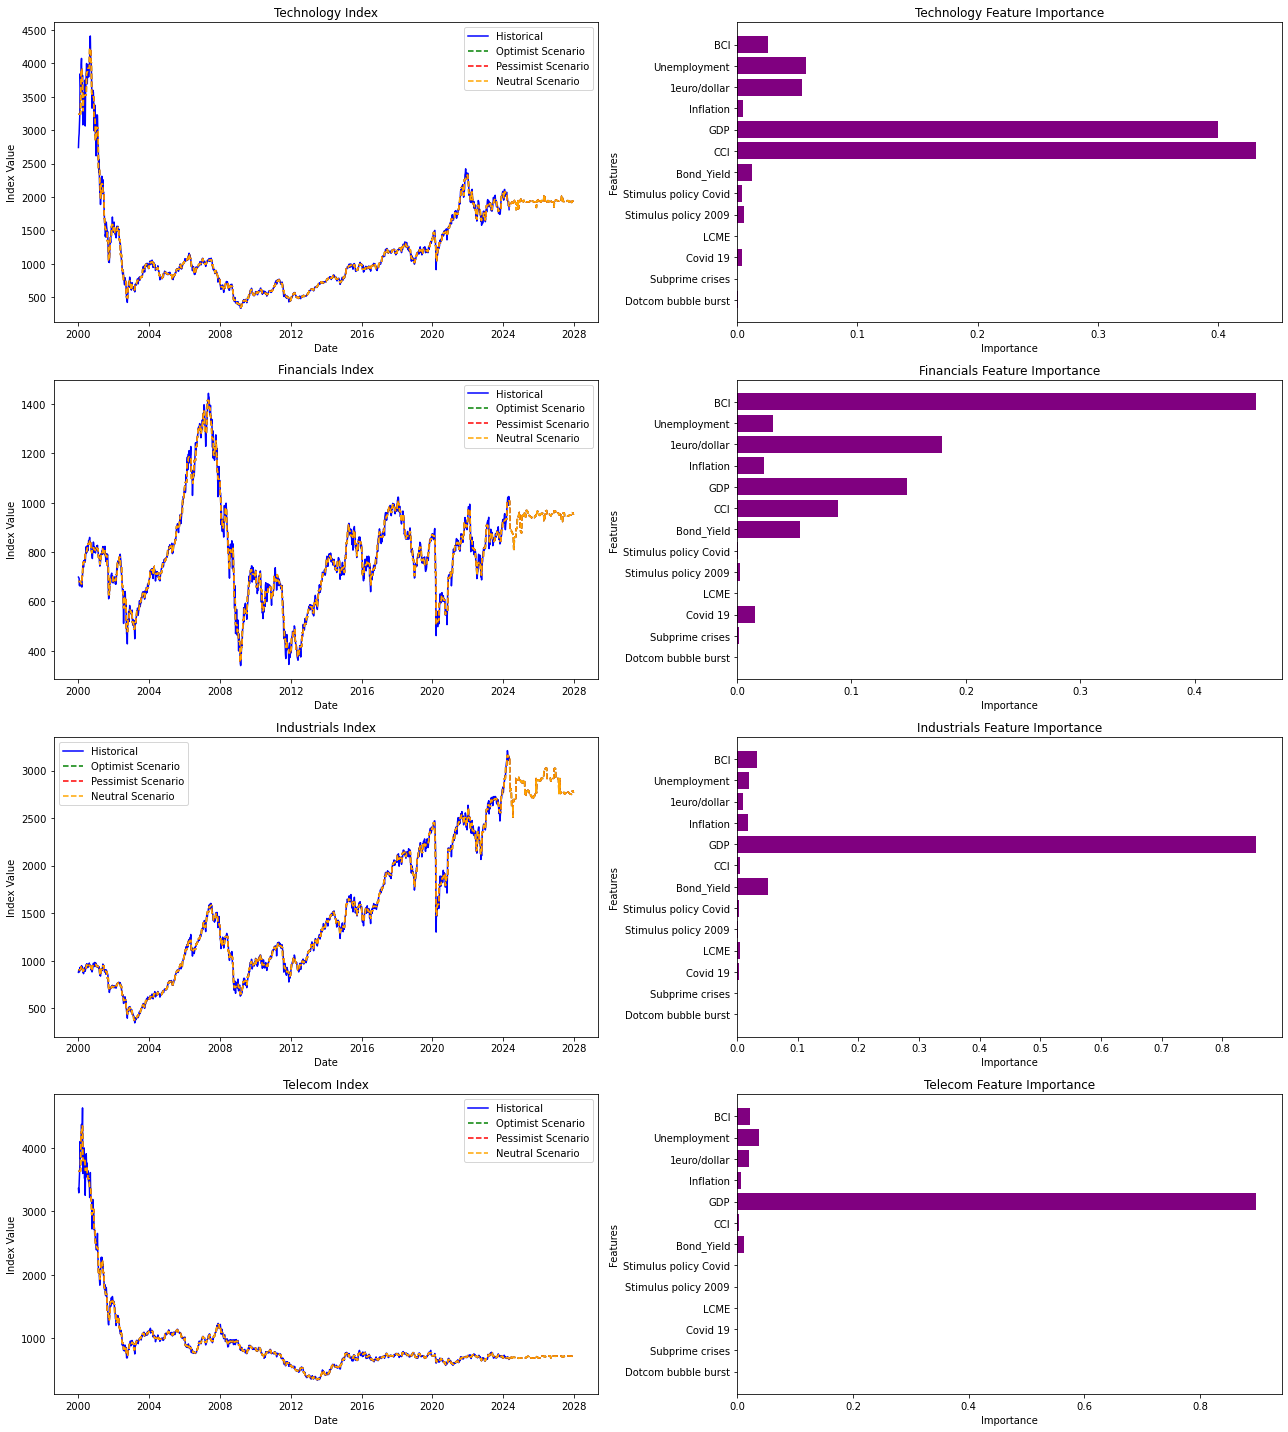

In [78]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
# france = pd.read_csv('path_to_france_data.csv')
# france_extended_optimist = pd.read_csv('path_to_france_extended_optimist.csv')
# france_extended_pessimist = pd.read_csv('path_to_france_extended_pessimist.csv')
# france_extended_neutral = pd.read_csv('path_to_france_extended_neutral.csv')

# Prepare the data
indices = ['Technology', 'Financials', 'Industrials', 'Telecom']
features = ['Dotcom bubble burst', 'Subprime crises', 'Covid 19', 'LCME', 
            'Stimulus policy 2009', 'Stimulus policy Covid', 'Bond_Yield', 
            'CCI', 'GDP', 'Inflation', '1euro/dollar', 'Unemployment', 'BCI']

# Fit the models using the entire dataset
models = {}
feature_importances = {}
for index in indices:
    X = france[features]
    y = france[index]

    # Fit the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Store the trained model
    models[index] = rf_model

    # Store the feature importances
    feature_importances[index] = rf_model.feature_importances_

# Function to clean and prepare data for prediction
def clean_data(df, features):
    df_cleaned = df.copy()
    df_cleaned = df_cleaned[features].replace([np.inf, -np.inf], np.nan).dropna()
    return df_cleaned

# Function to predict indices for a given extended dataframe
def predict_indices(models, extended_df, features, indices):
    predictions = {}
    extended_df_cleaned = clean_data(extended_df, features)
    for index in indices:
        rf_model = models[index]
        predictions[index] = rf_model.predict(extended_df_cleaned)
    
    # Reindex predictions to match the original extended_df
    predictions_df = pd.DataFrame(predictions, index=extended_df_cleaned.index)
    return predictions_df.reindex(extended_df.index).fillna(method='ffill').fillna(method='bfill')

# Predict the indices for each scenario
pred_optimist = predict_indices(models, france_extended_optimist, features, indices)
pred_pessimist = predict_indices(models, france_extended_pessimist, features, indices)
pred_neutral = predict_indices(models, france_extended_neutral, features, indices)

# Add predictions to the respective extended dataframes
for index in indices:
    france_extended_optimist[index + '_pred'] = pred_optimist[index]
    france_extended_pessimist[index + '_pred'] = pred_pessimist[index]
    france_extended_neutral[index + '_pred'] = pred_neutral[index]

# Plot historical values and predictions for each index
plt.figure(figsize=(18, 20))

for i, index in enumerate(indices):
    # Plot historical values and predictions
    plt.subplot(4, 2, i * 2 + 1)
    plt.plot(france.index, france[index], label='Historical', color='blue')
    plt.plot(france_extended_optimist.index, france_extended_optimist[index + '_pred'], label='Optimist Scenario', color='green', linestyle='--')
    plt.plot(france_extended_pessimist.index, france_extended_pessimist[index + '_pred'], label='Pessimist Scenario', color='red', linestyle='--')
    plt.plot(france_extended_neutral.index, france_extended_neutral[index + '_pred'], label='Neutral Scenario', color='orange', linestyle='--')
    plt.title(f'{index} Index')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.legend()

    # Plot feature importances
    plt.subplot(4, 2, i * 2 + 2)
    importance = feature_importances[index]
    plt.barh(features, importance, color='purple')
    plt.title(f'{index} Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')

plt.tight_layout()
plt.show()
